In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

In [2]:
df_train=pd.read_csv('../data/output/development_sample_cleaned_categorical.csv')
df_test=pd.read_csv('../data/output/testing_sample_cleaned_categorical.csv')

In [3]:
df_train = df_train.drop(['ID', 'customer_id'], axis=1)
df_test = df_test.drop(['ID', 'customer_id'], axis=1)

c:\Users\jansl\.conda\envs\Spyder\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


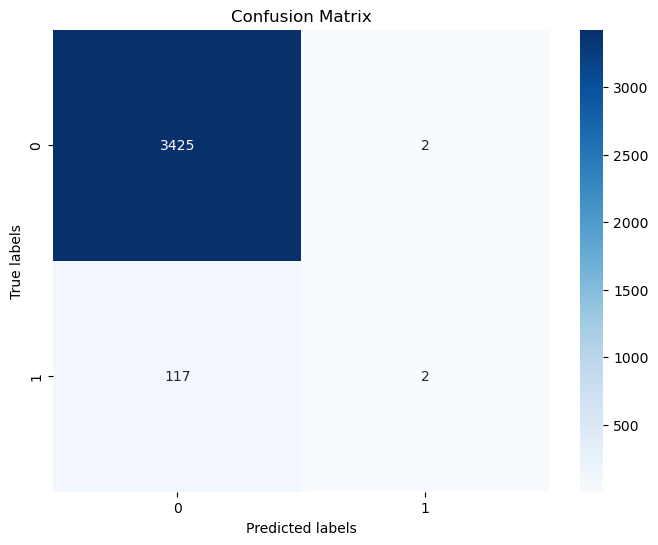

In [6]:
X_train = df_train.drop('target', axis=1)
y_train = df_train['target']
X_test = df_test.drop('target', axis=1)
y_test = df_test['target']

# Zbuduj i dopasuj model regresji logistycznej
model = LogisticRegression()
model.fit(X_train, y_train)

# Przewiduj etykiety dla danych testowych
y_pred = model.predict(X_test)

# Wygeneruj macierz pomyłek
conf_matrix = confusion_matrix(y_test, y_pred)

# Zwizualizuj macierz pomyłek
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

c:\Users\jansl\.conda\envs\Spyder\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


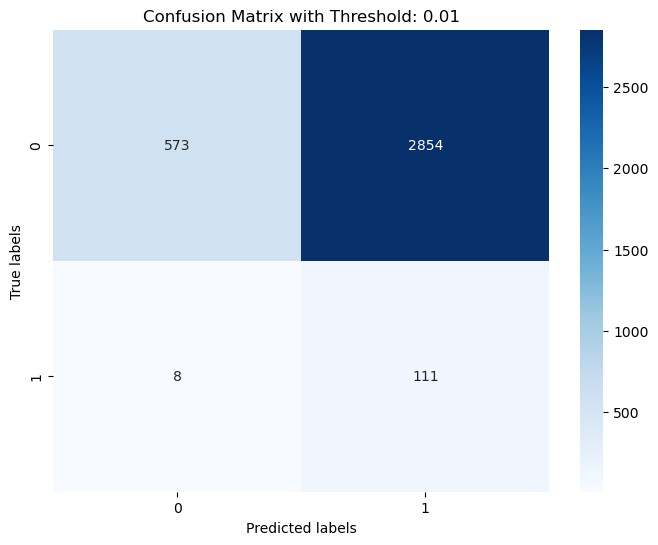

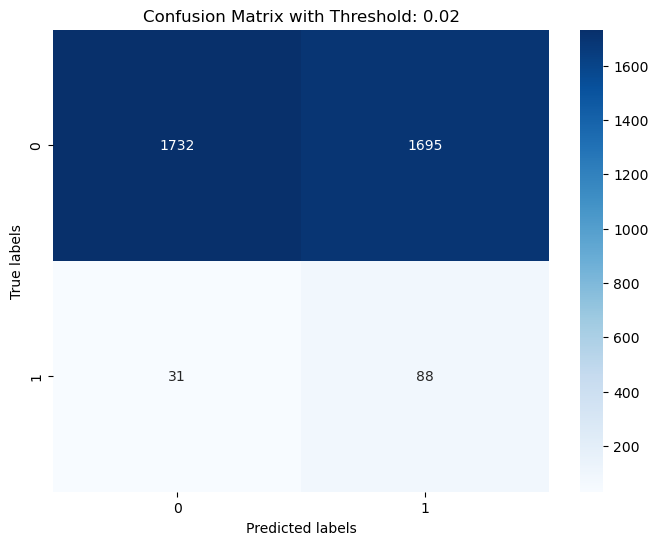

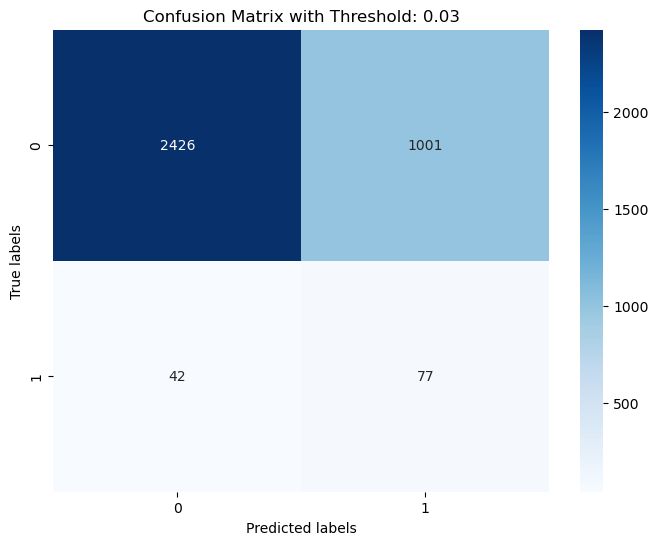

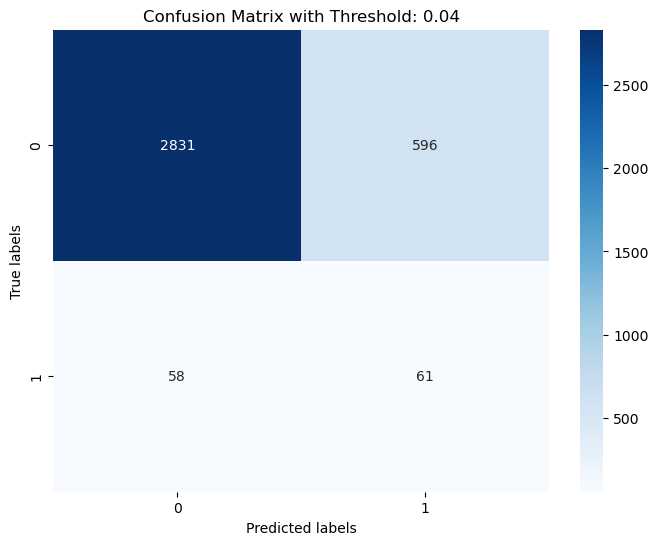

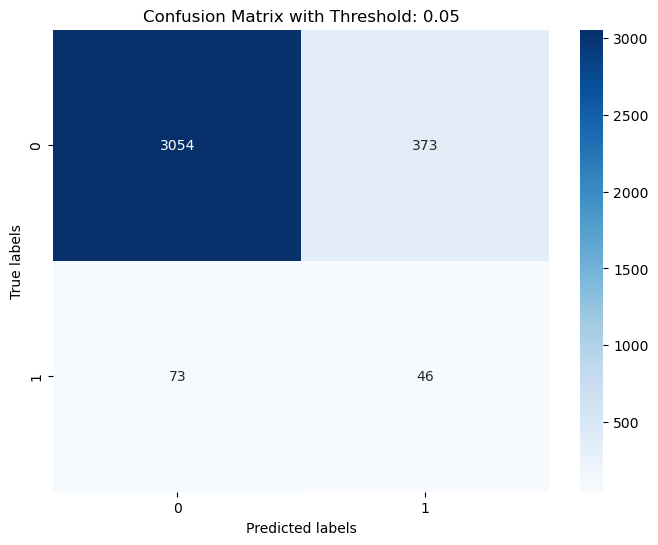

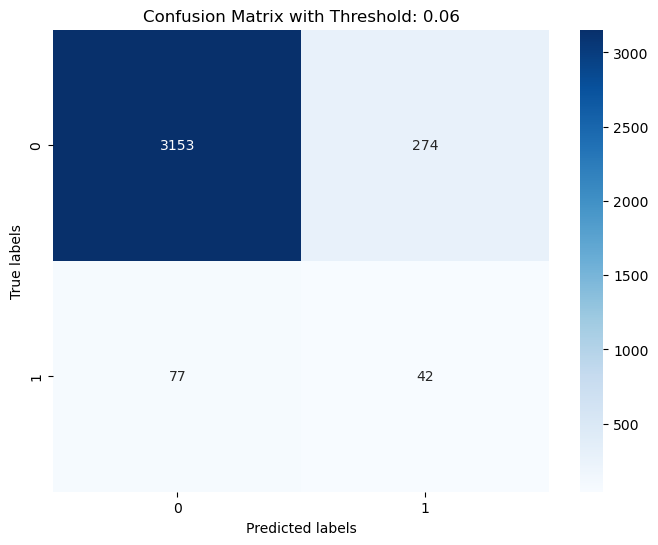

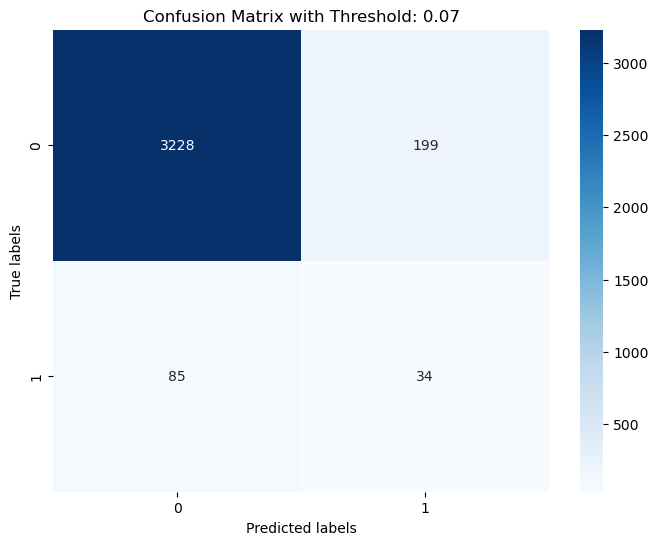

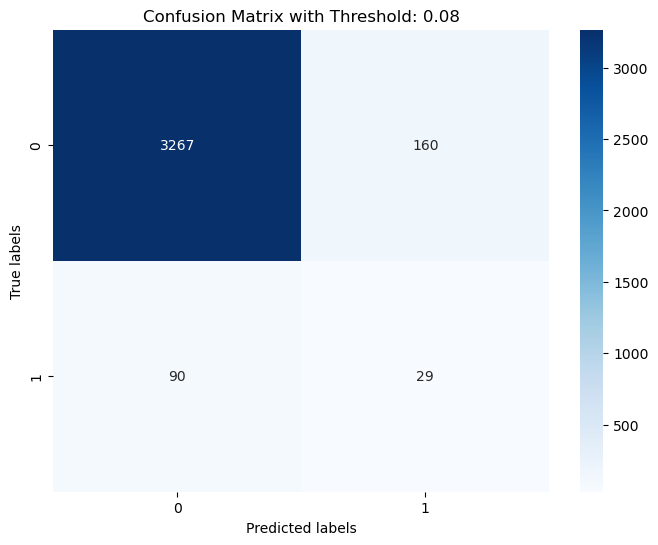

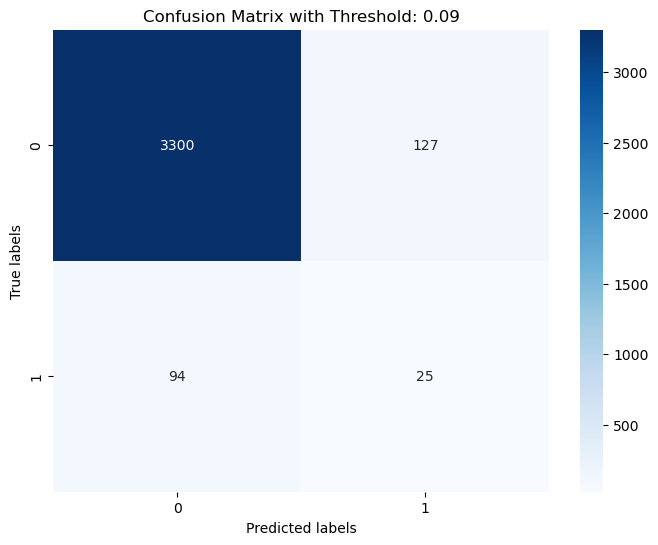

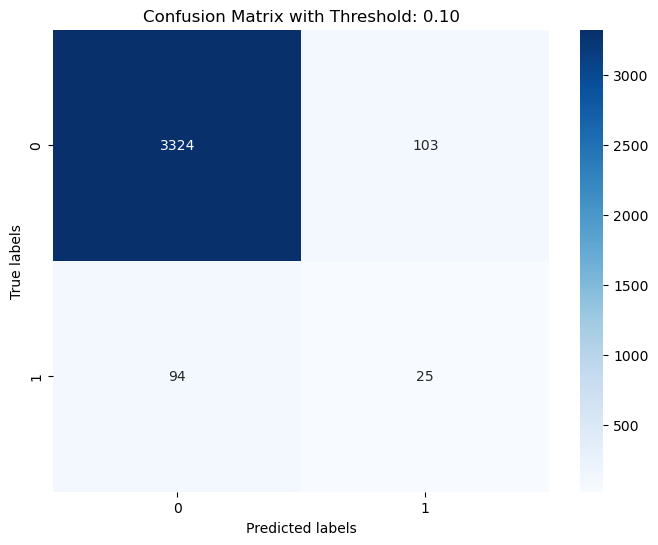

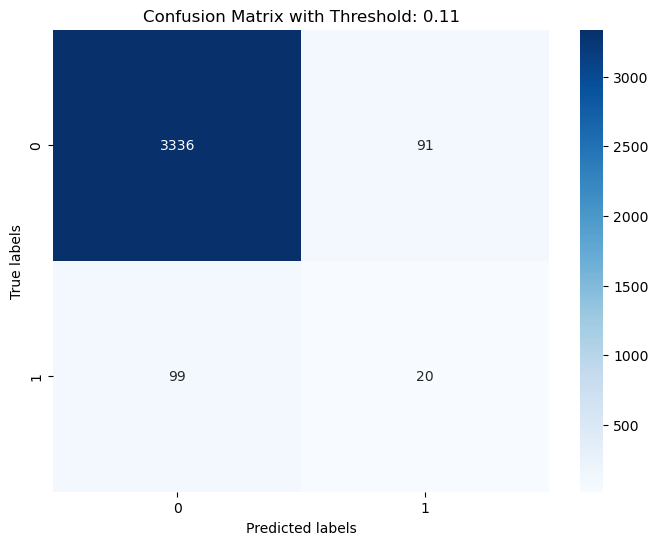

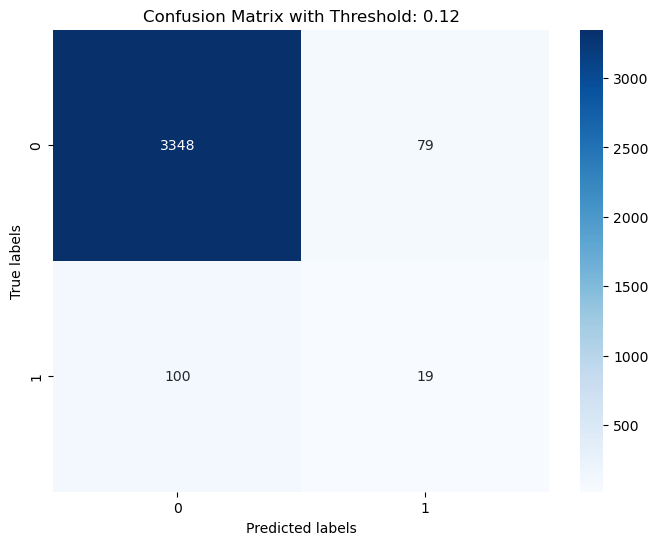

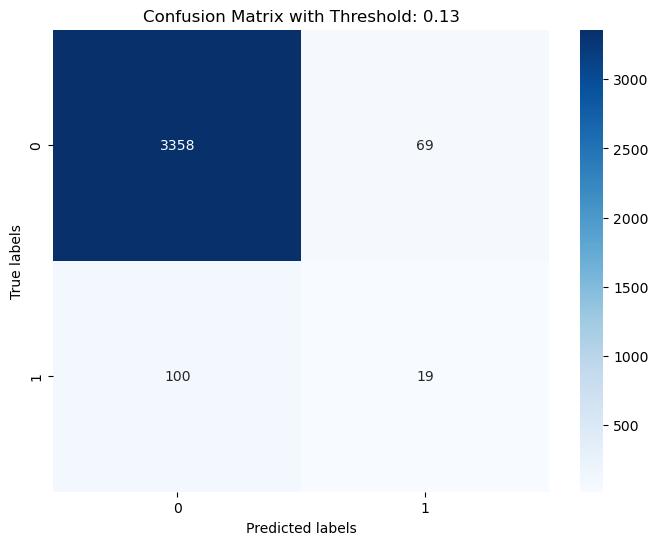

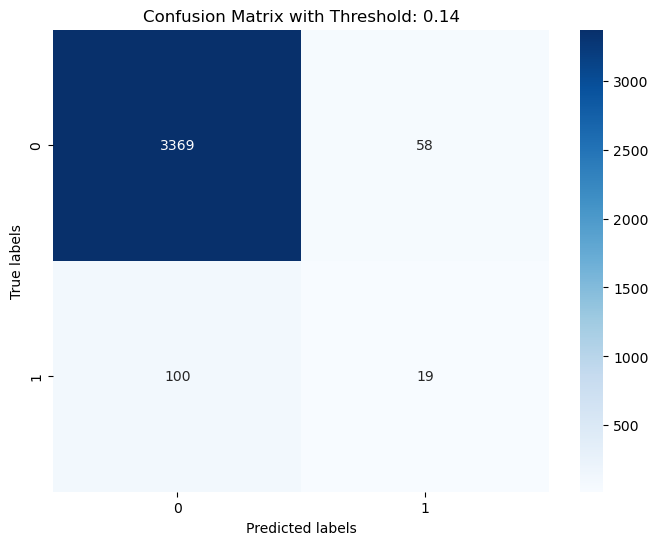

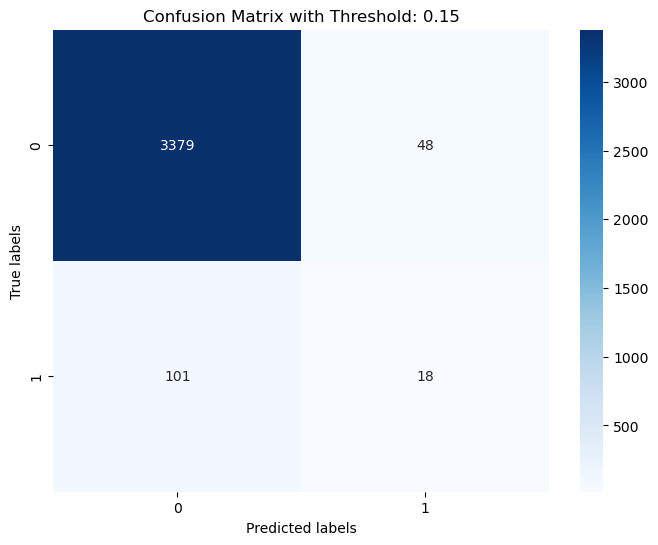

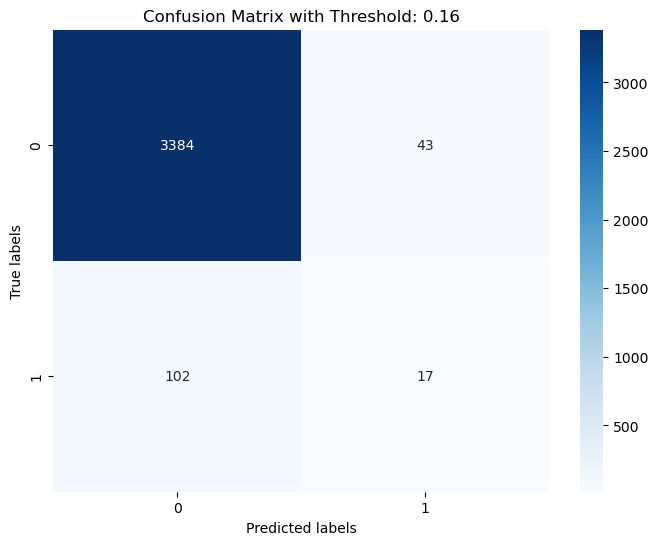

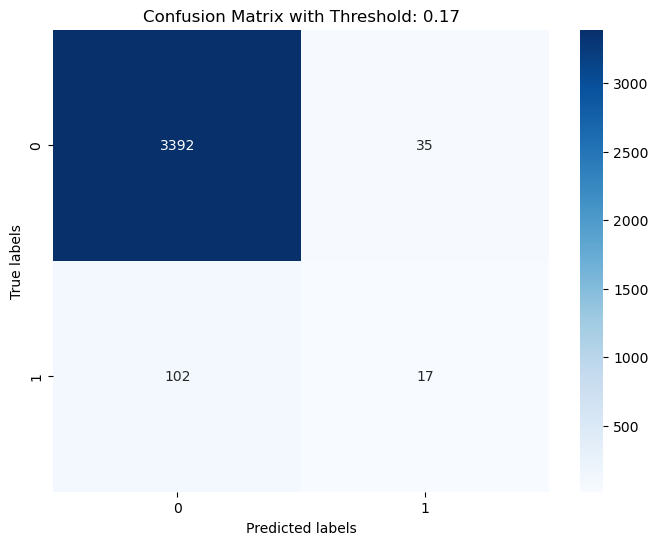

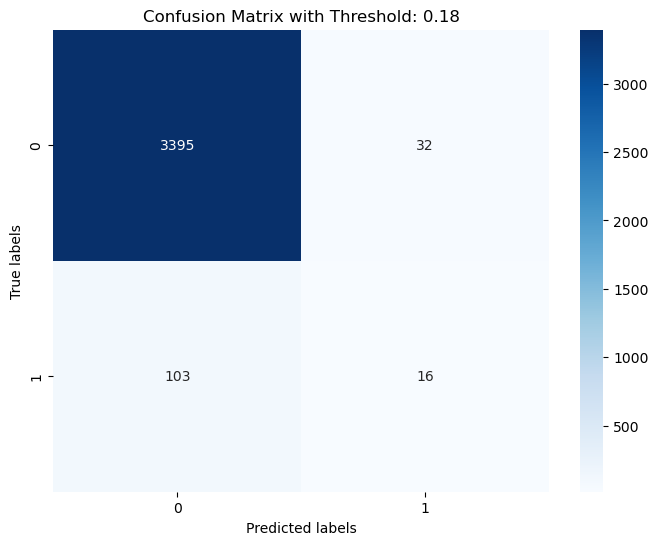

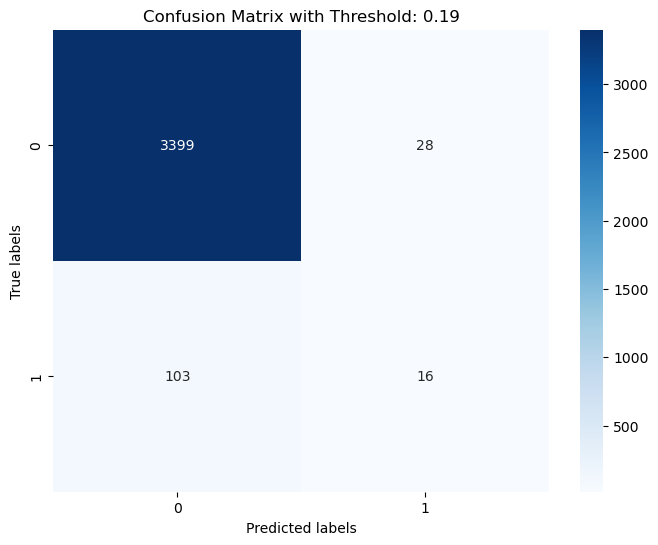

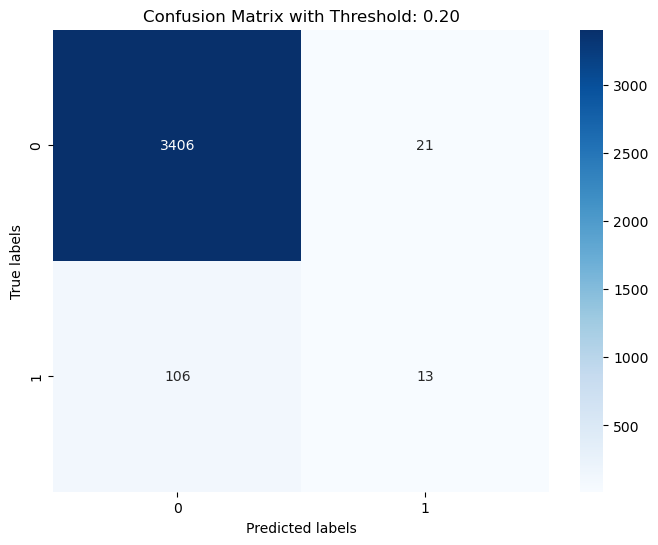

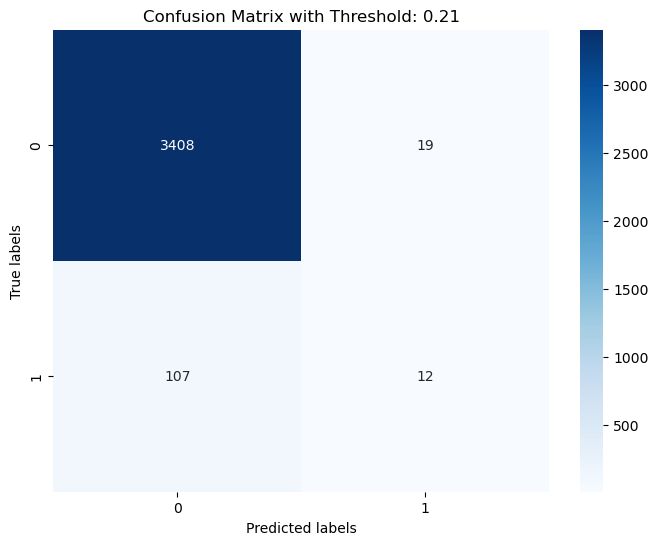

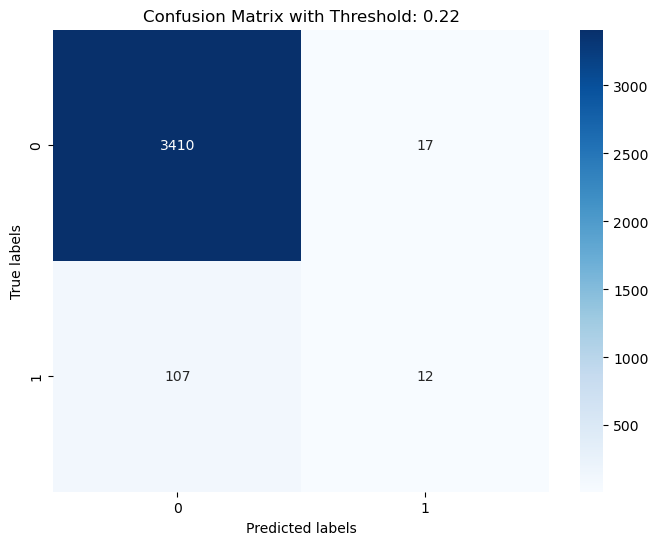

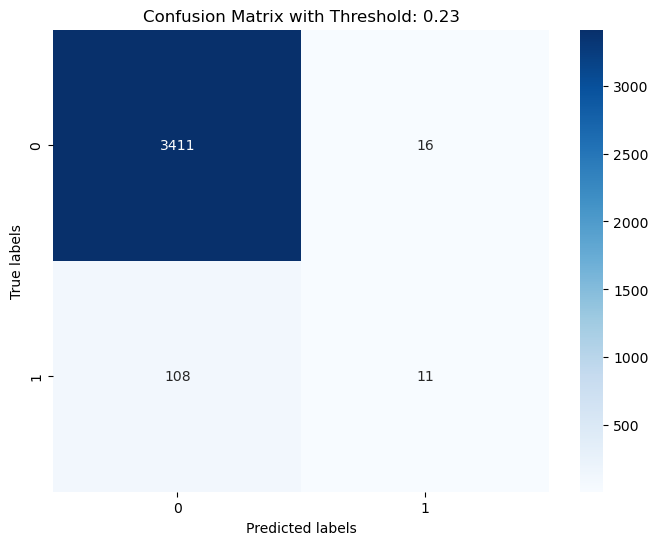

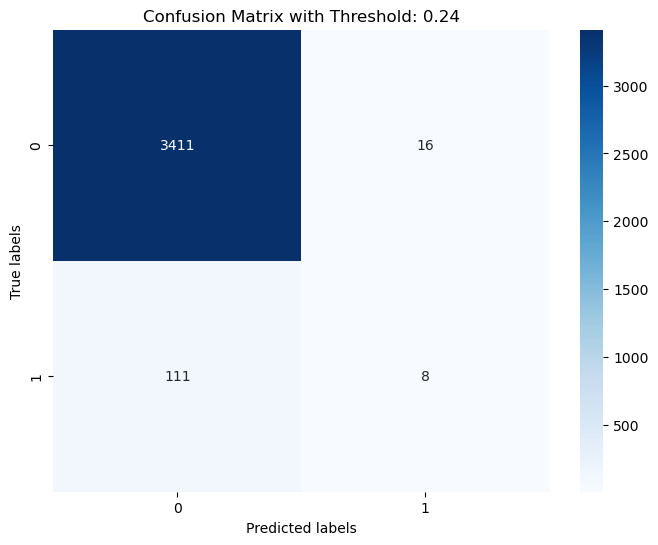

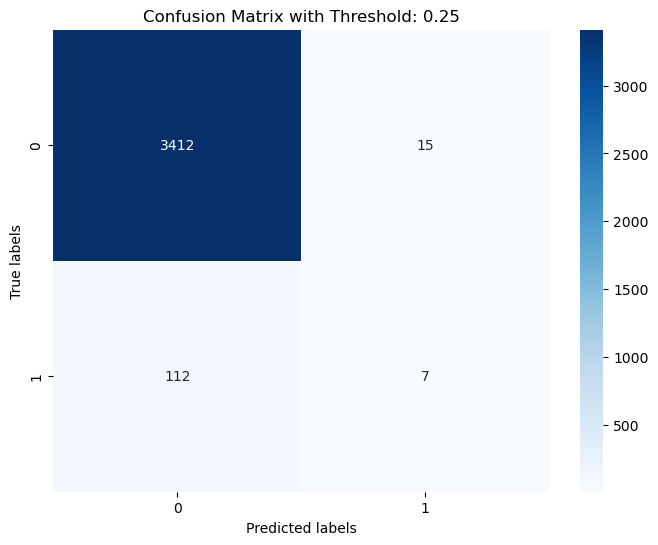

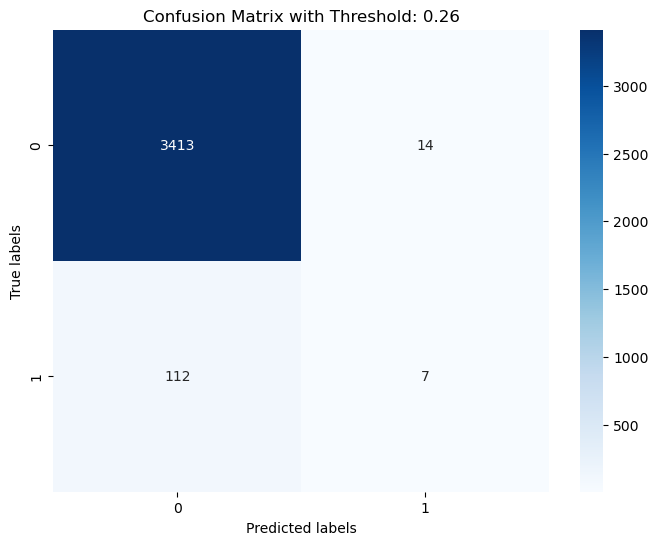

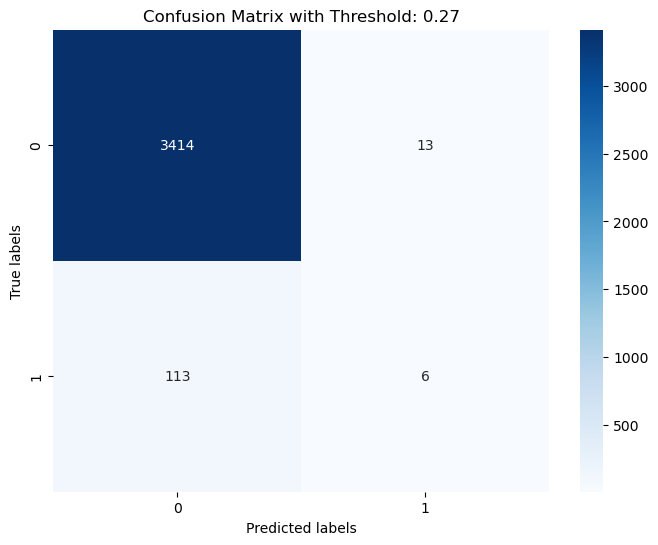

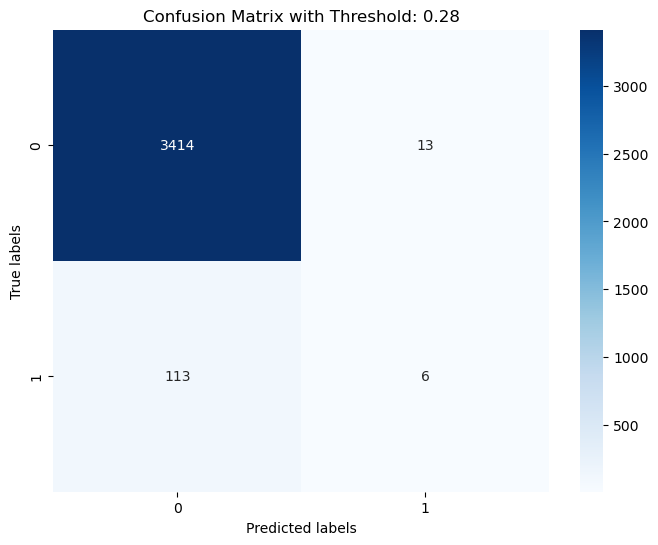

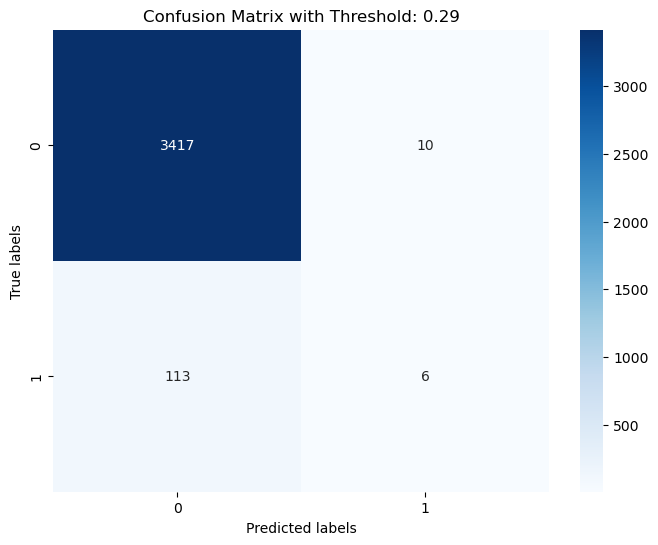

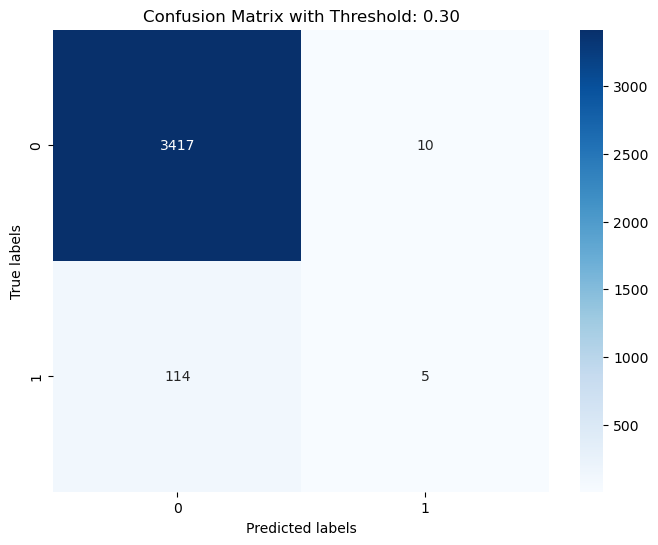

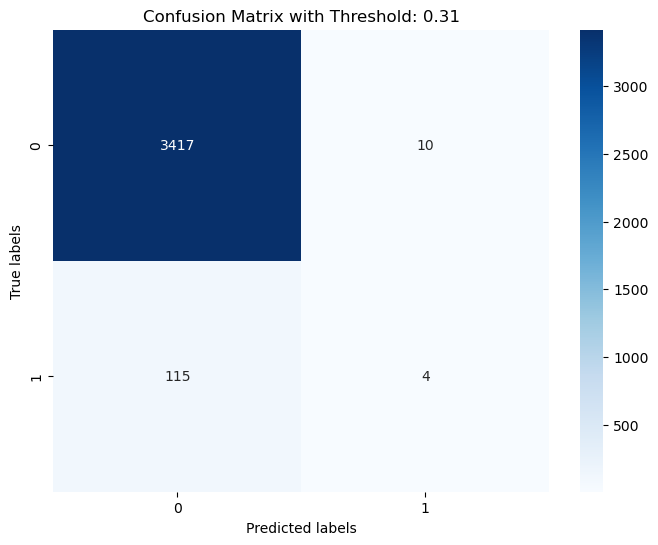

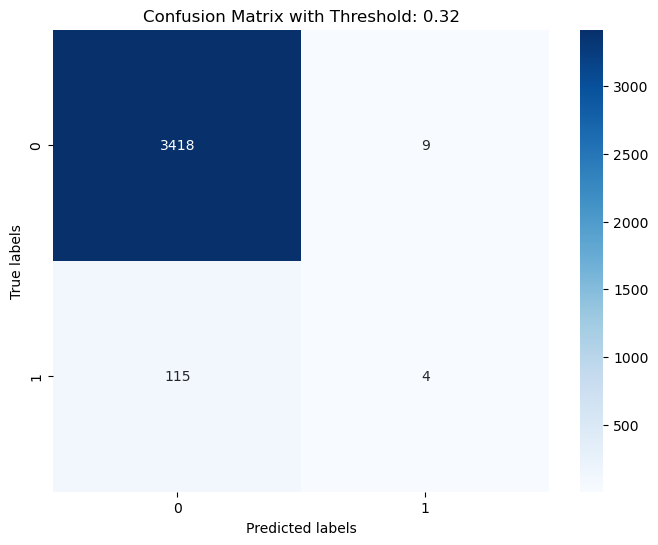

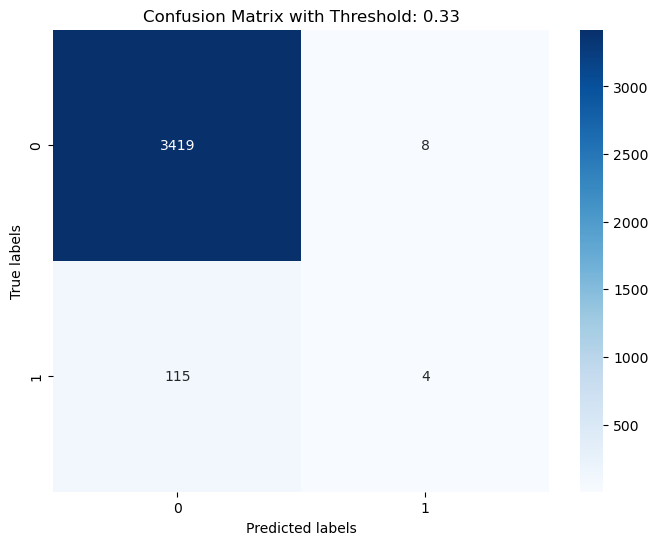

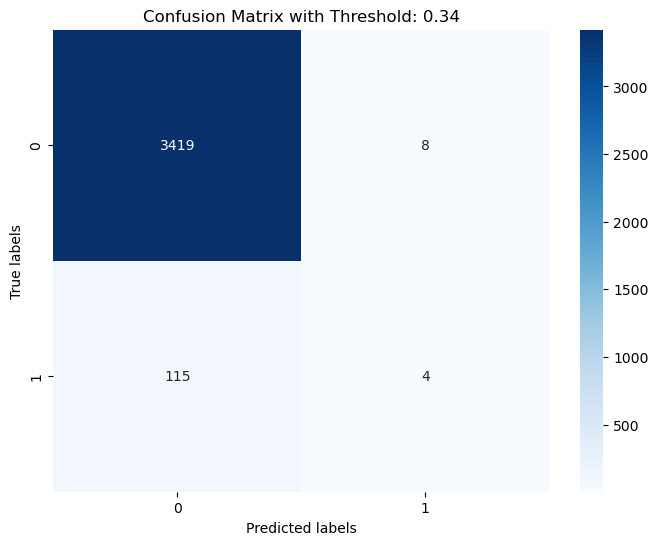

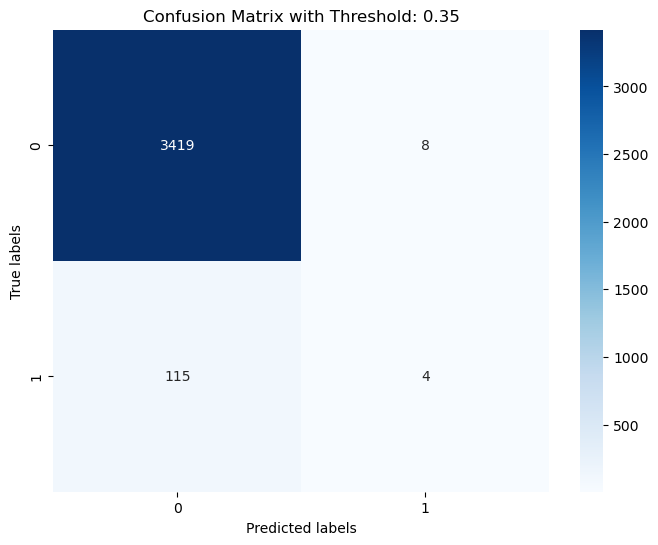

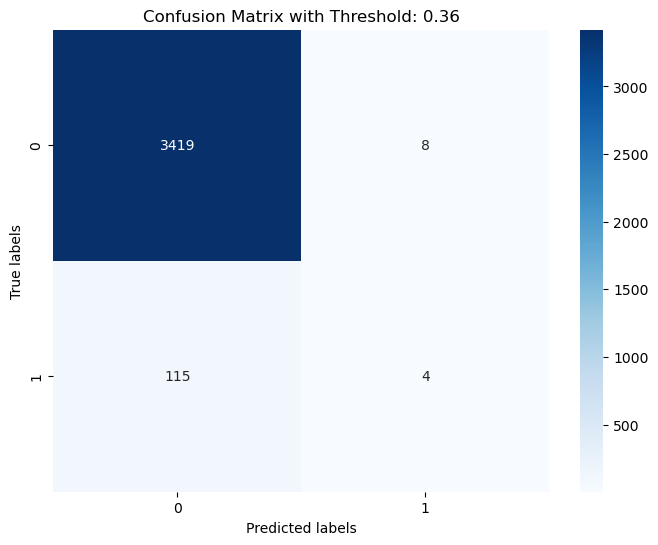

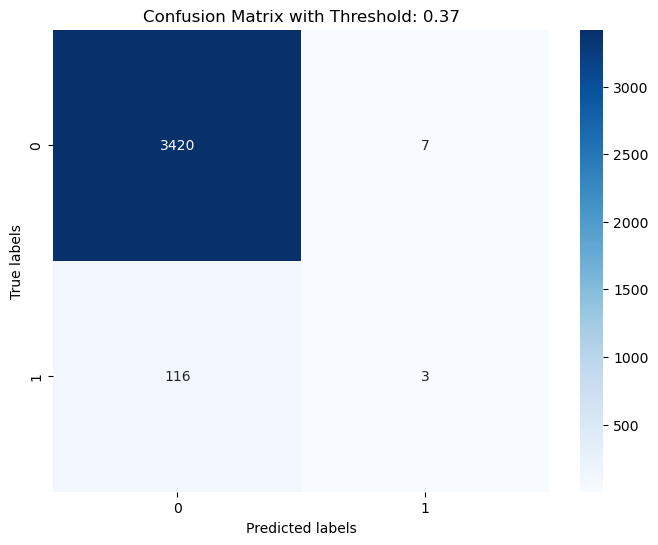

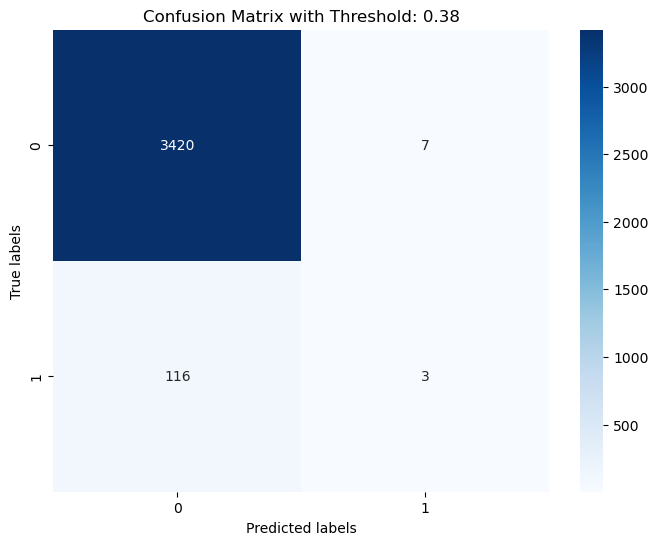

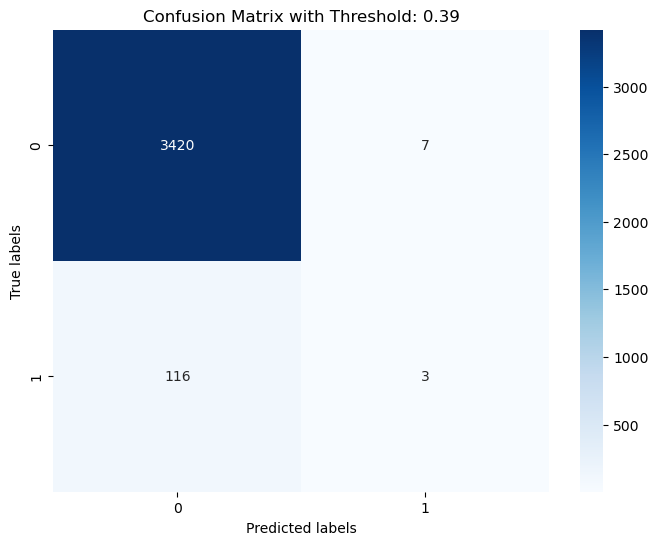

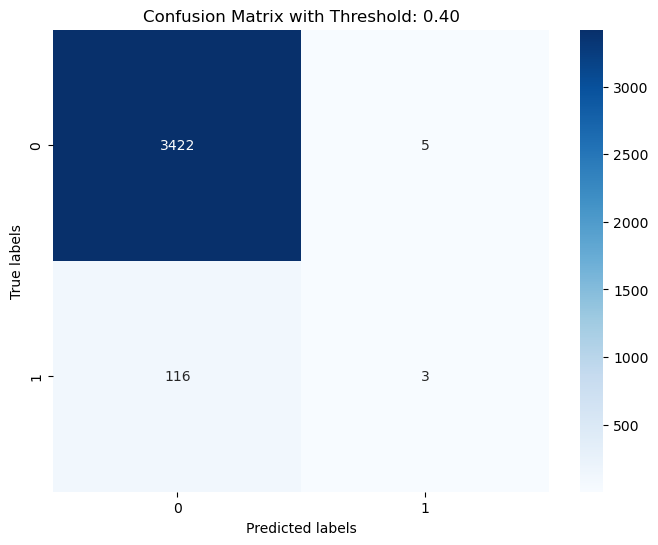

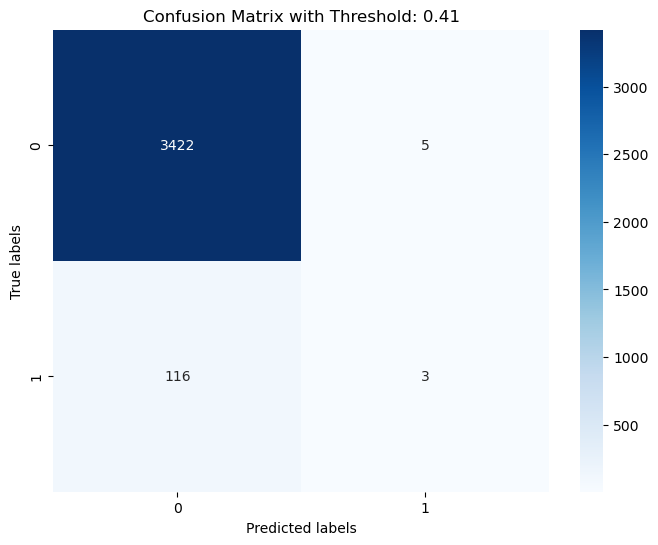

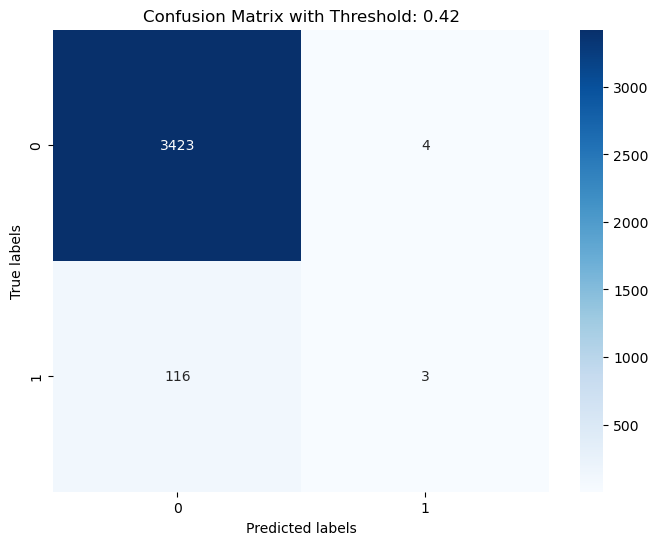

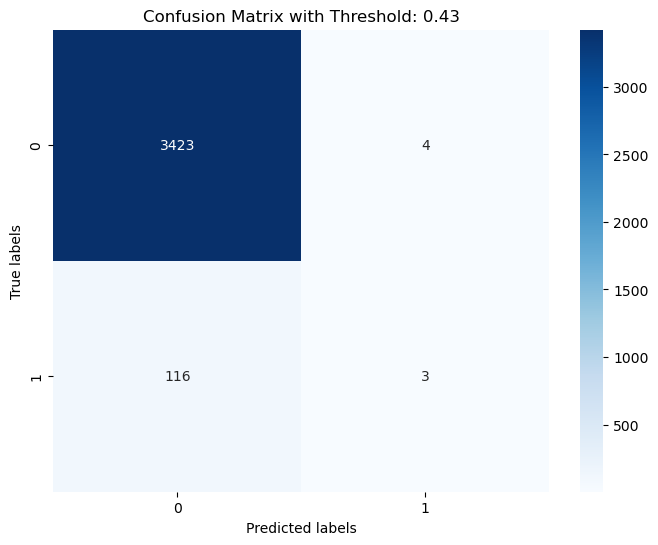

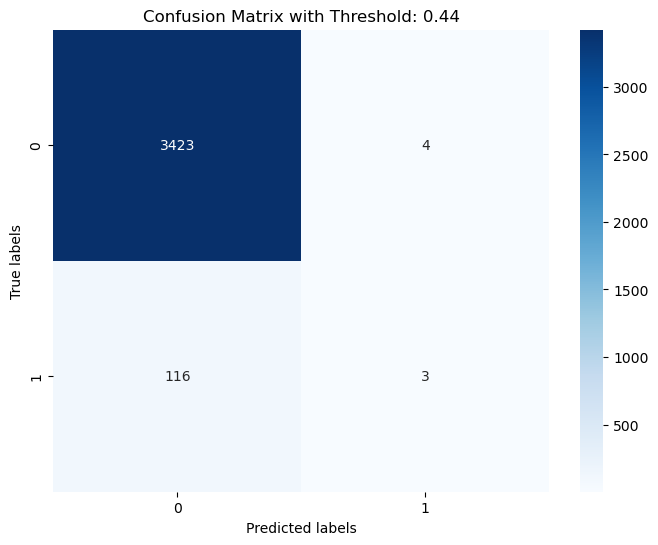

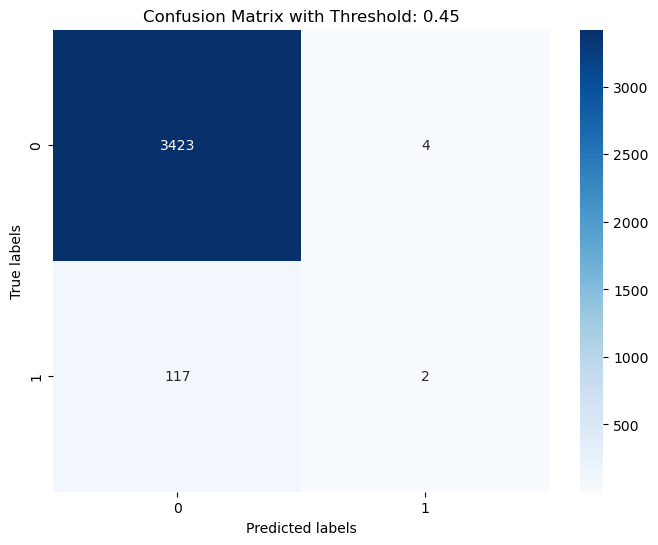

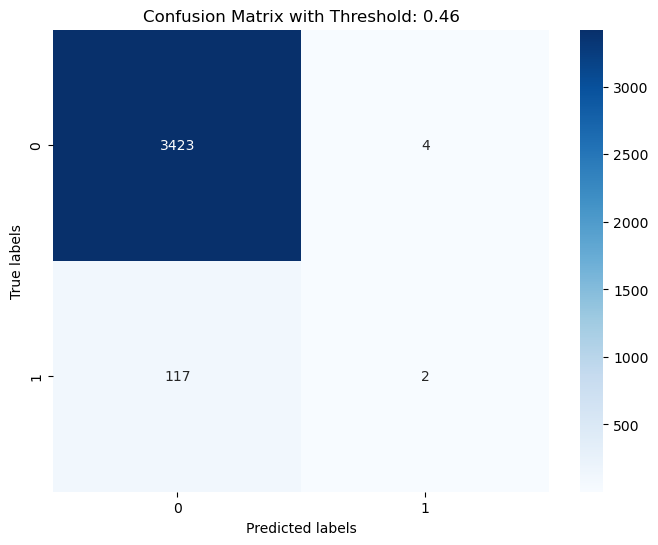

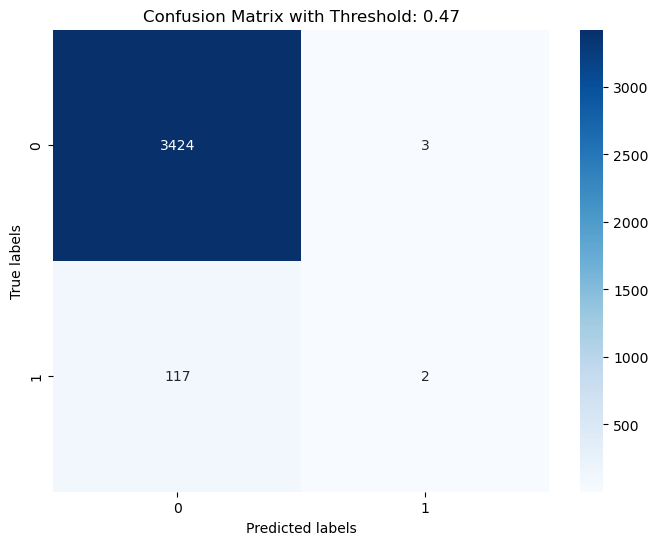

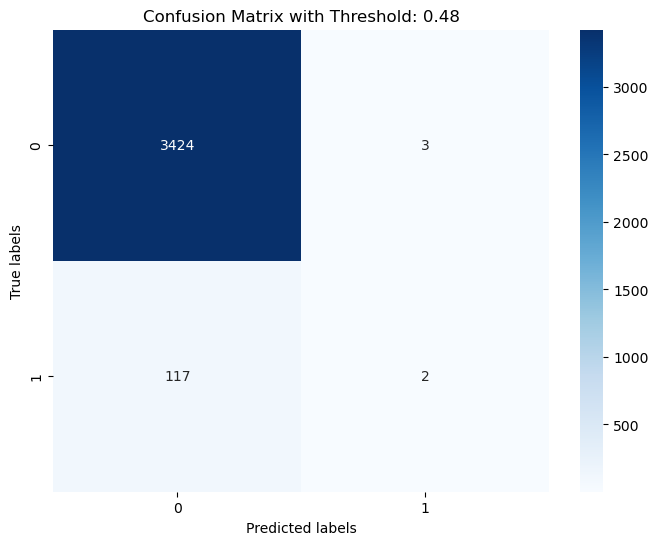

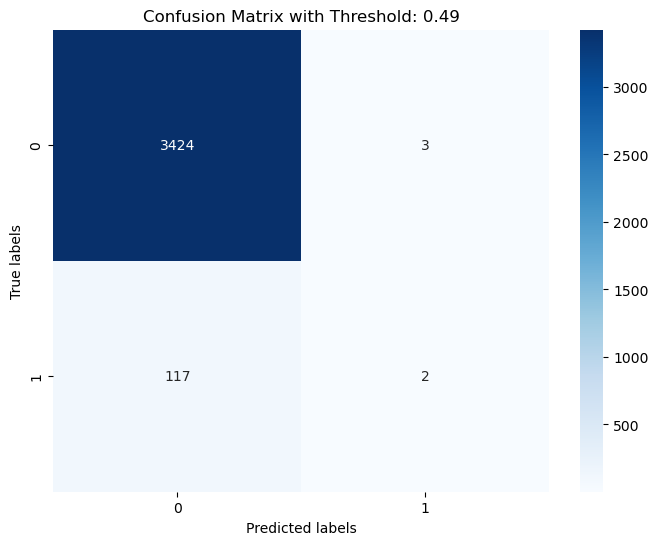

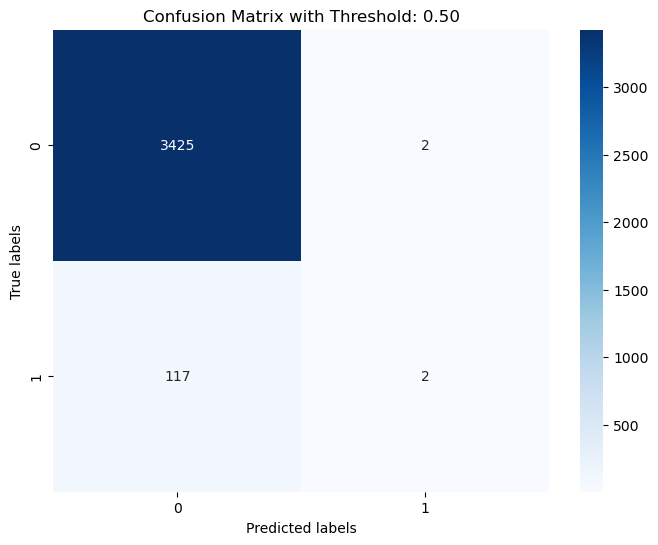

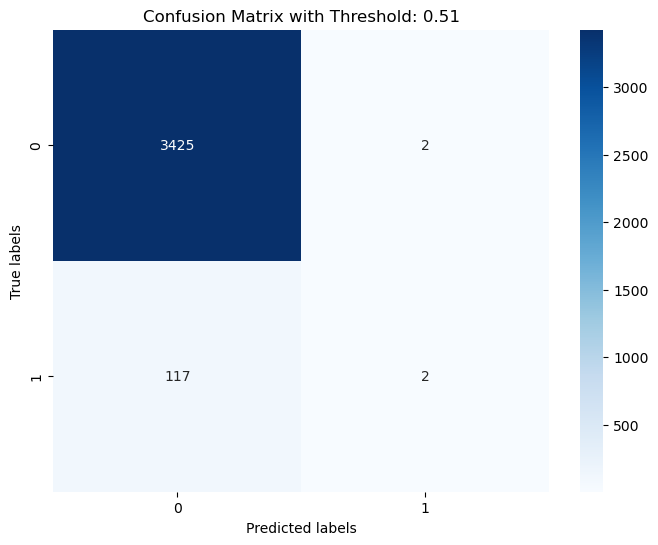

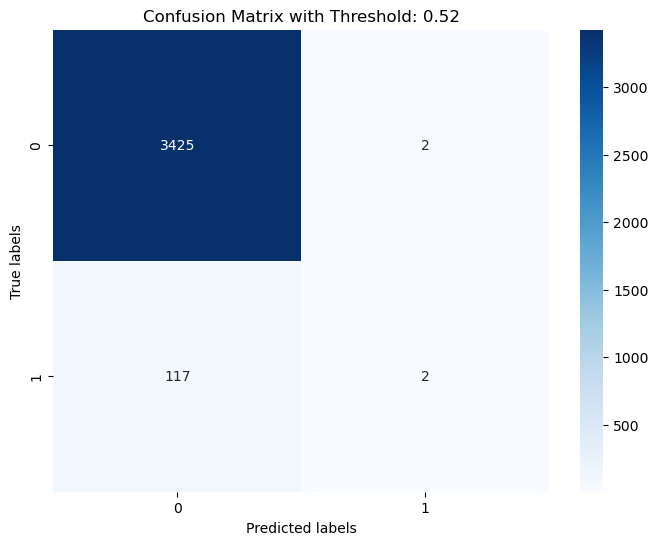

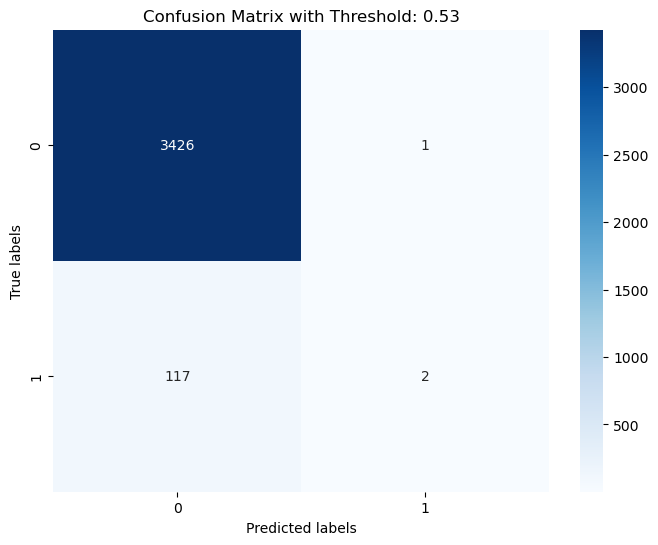

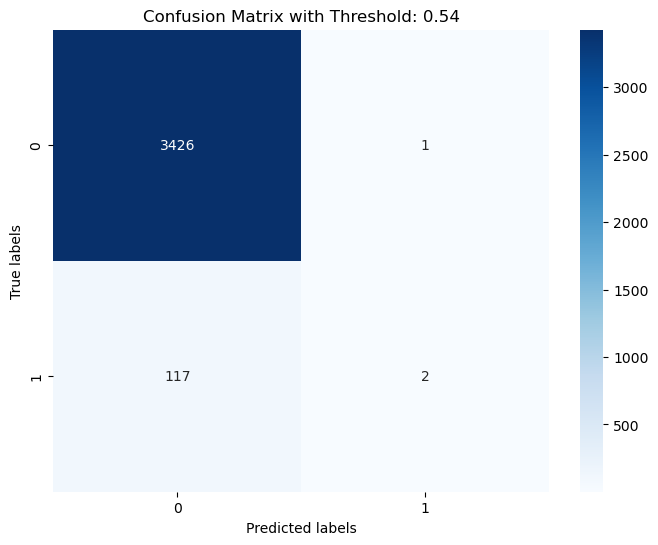

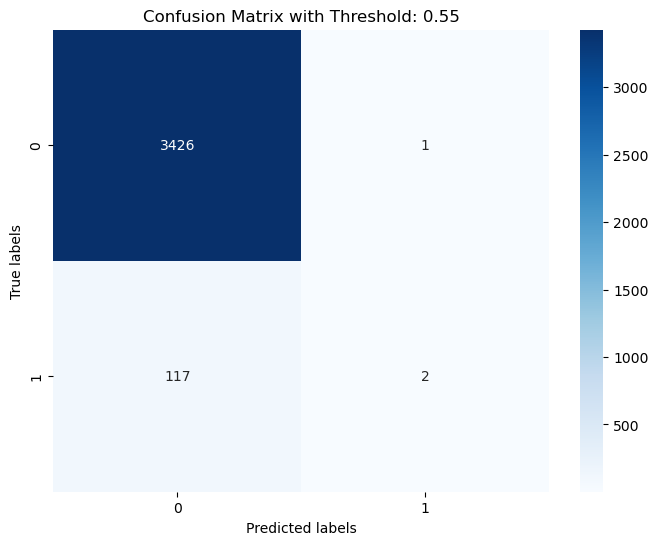

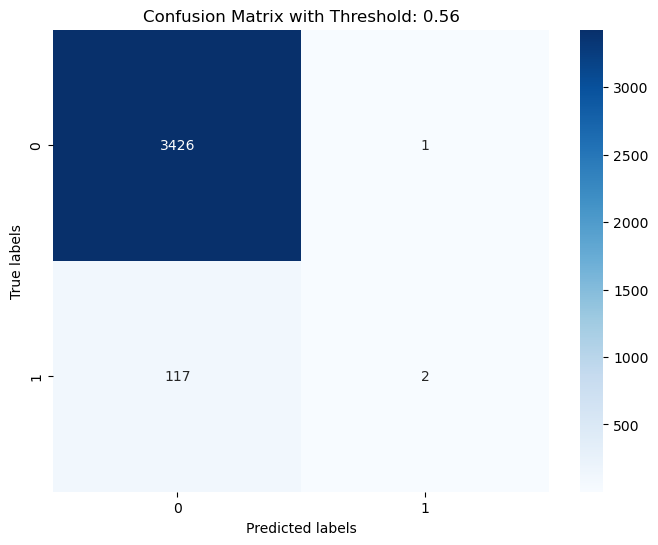

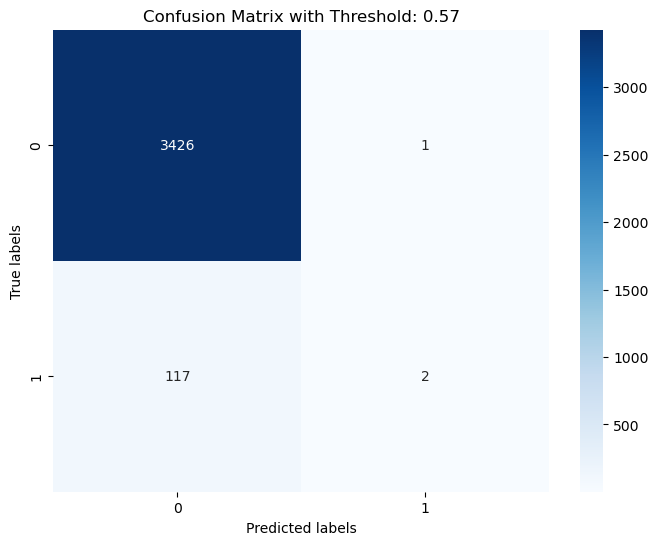

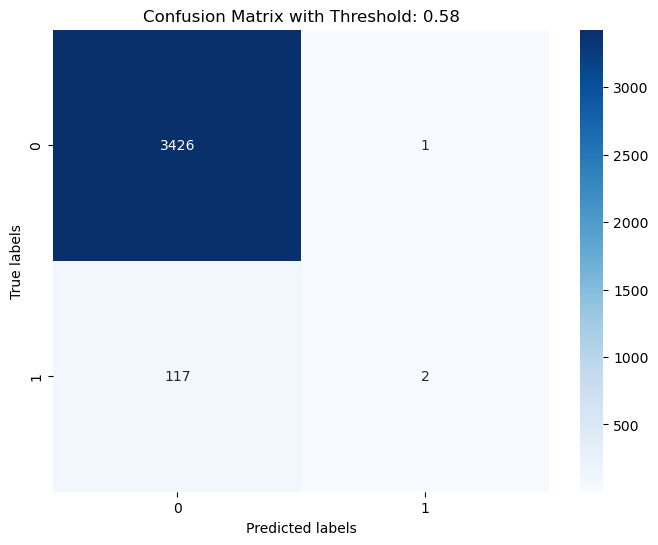

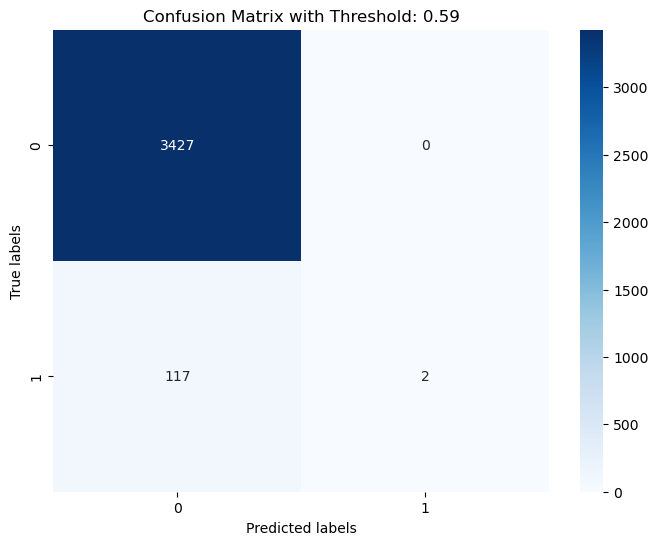

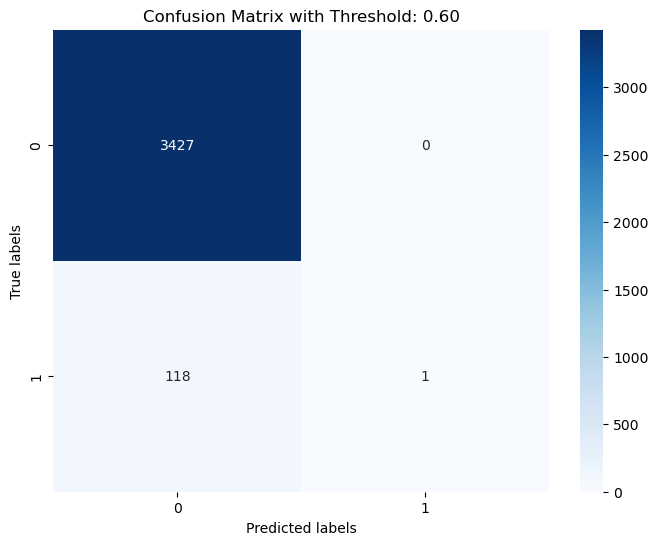

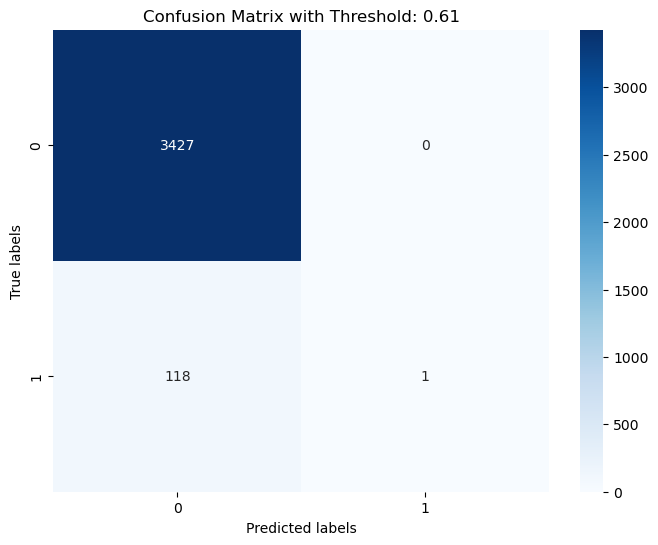

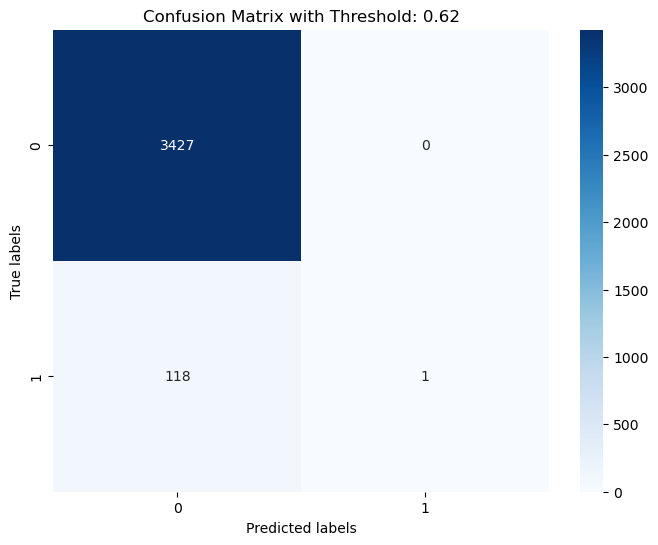

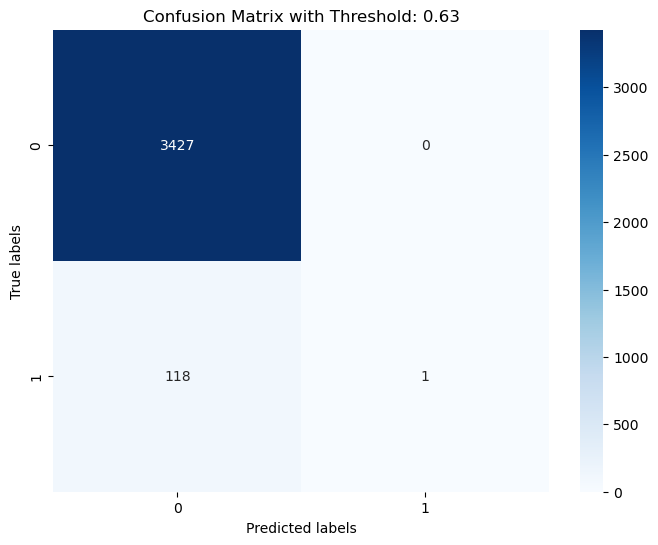

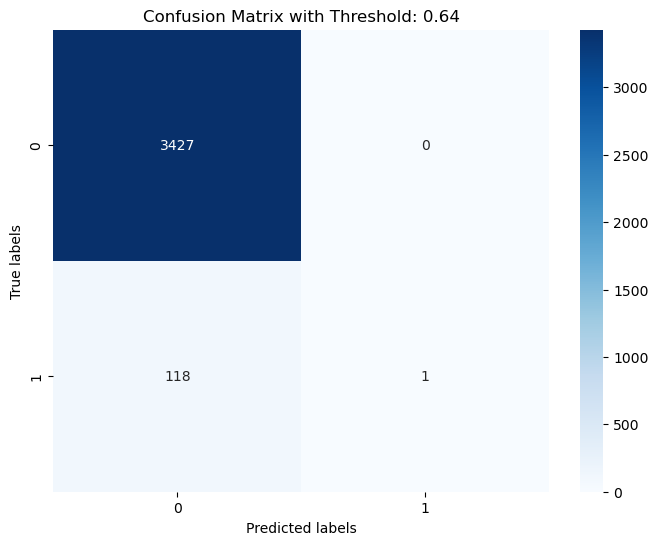

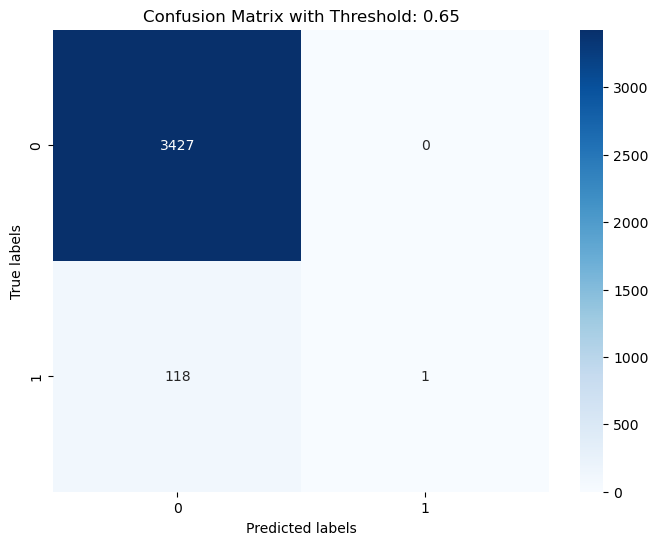

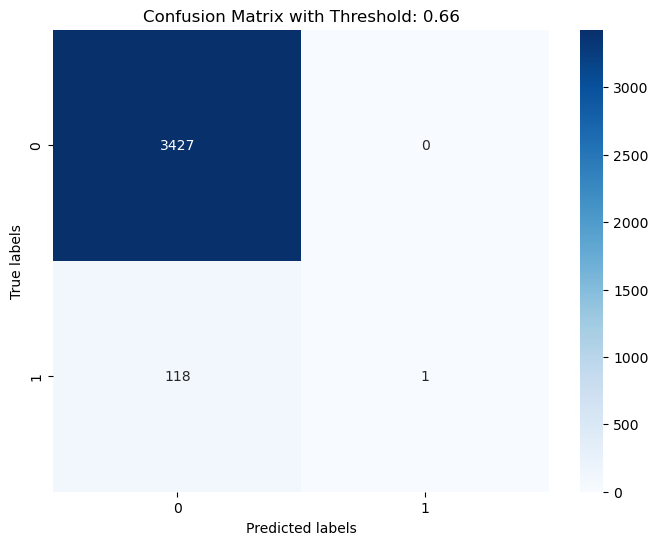

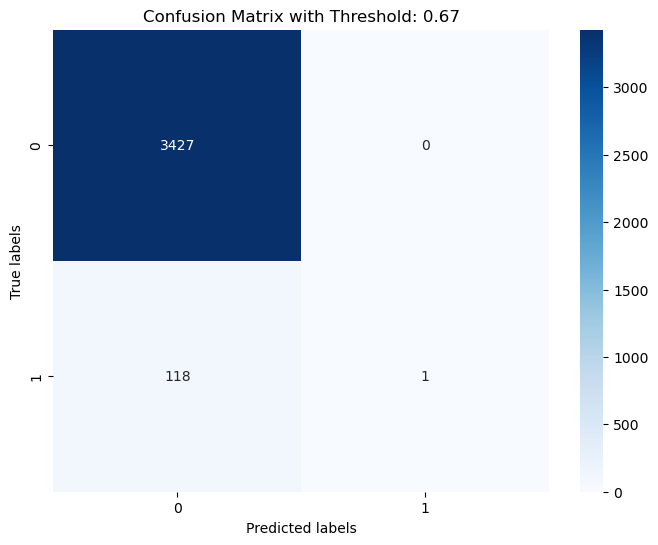

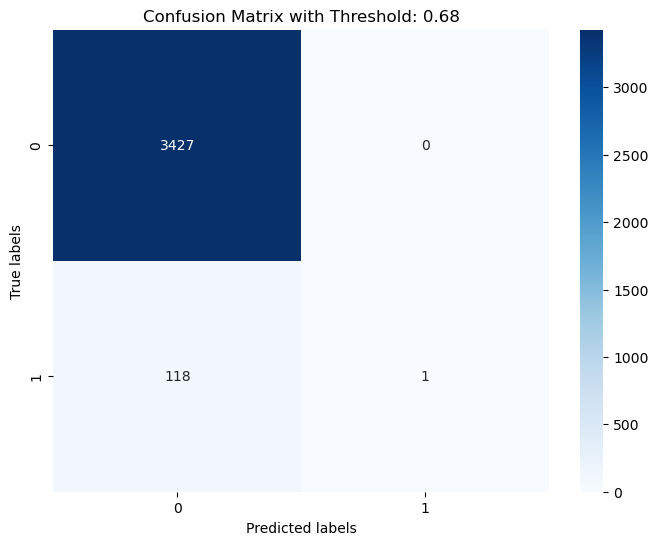

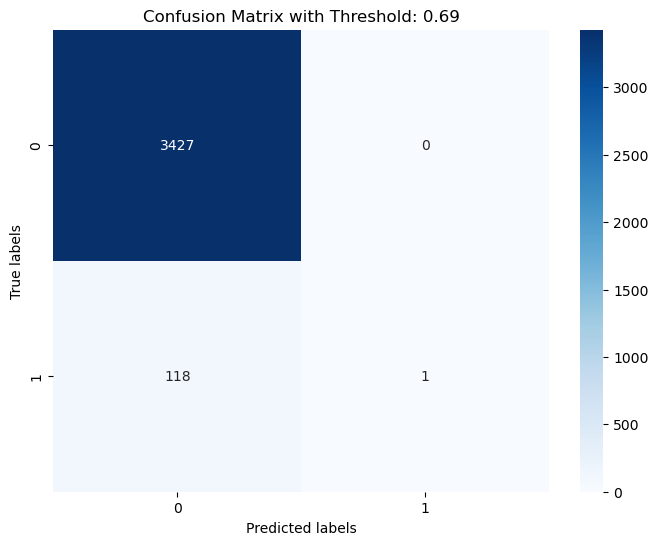

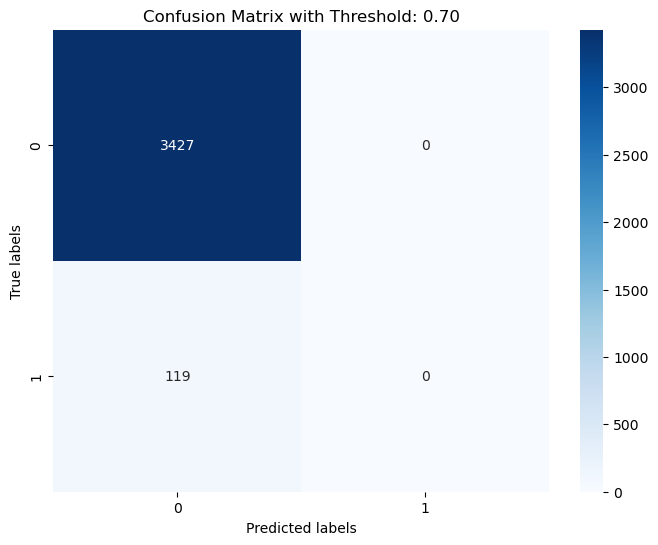

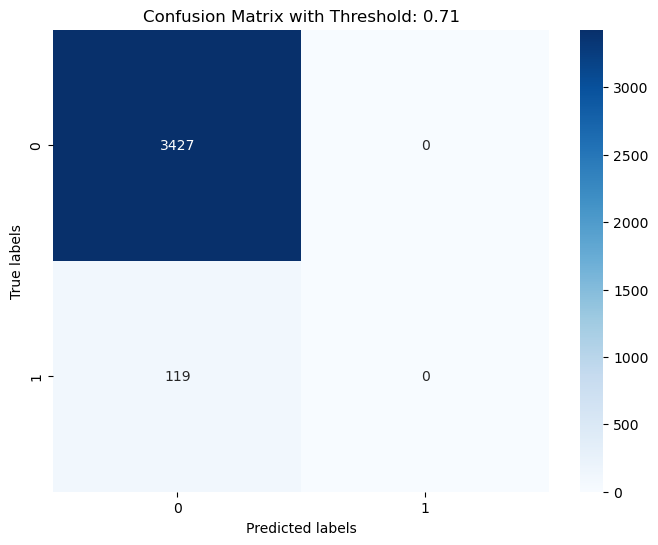

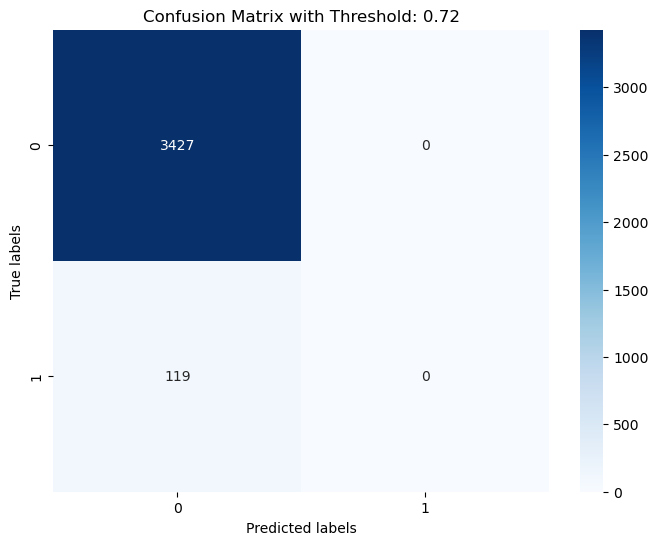

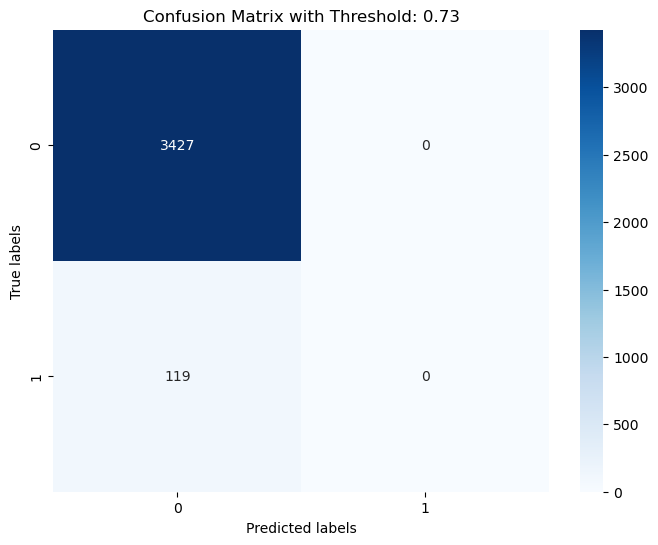

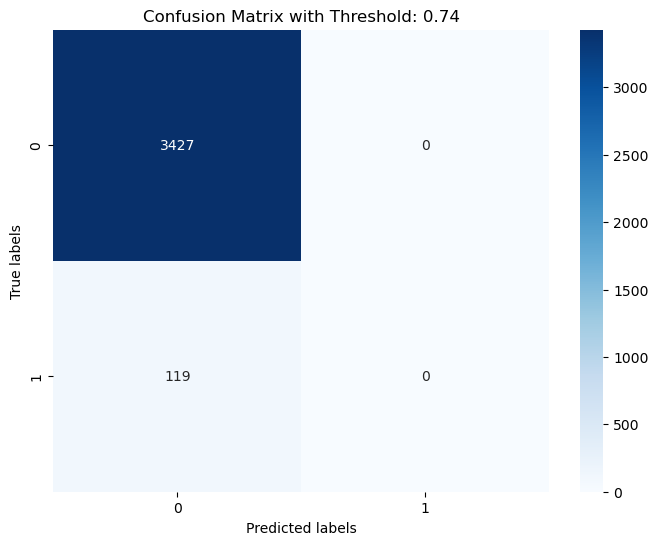

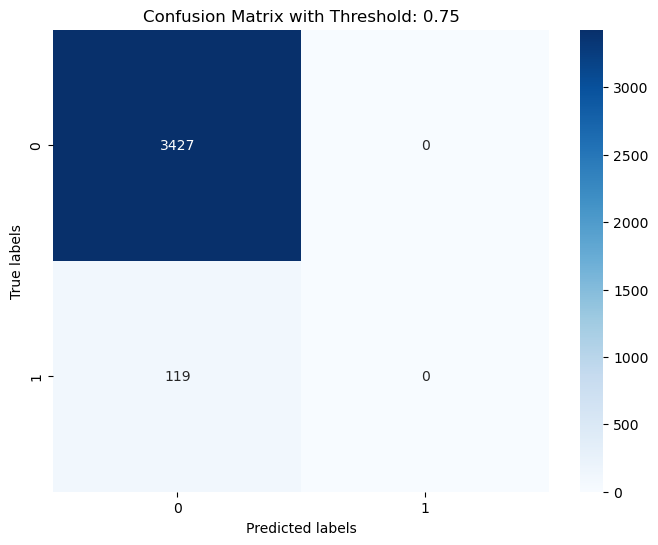

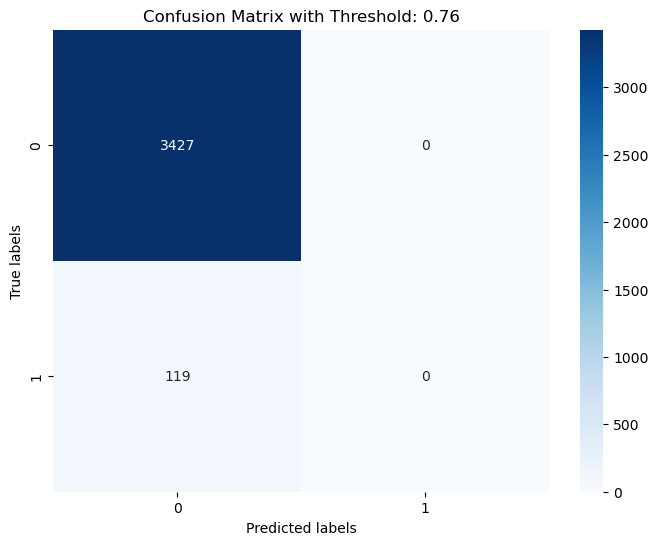

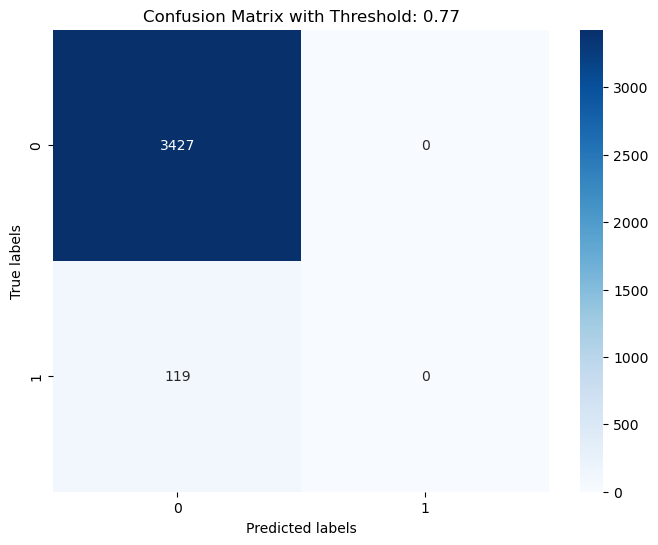

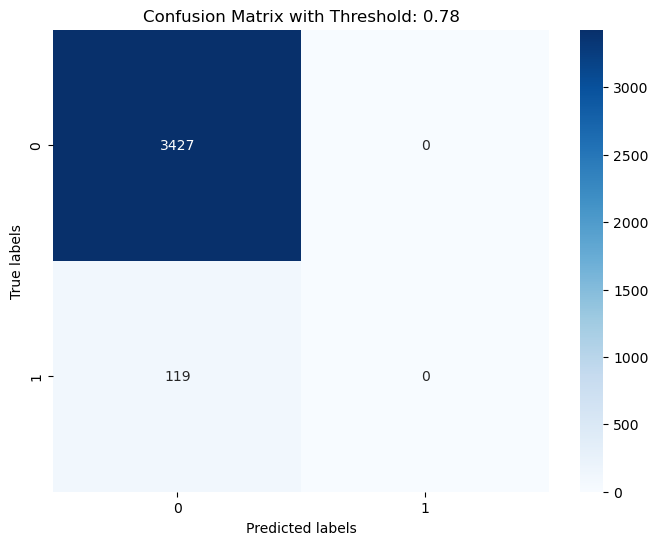

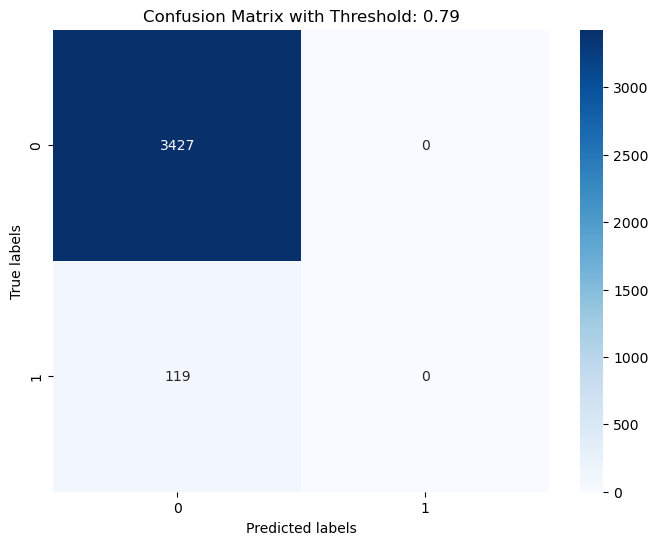

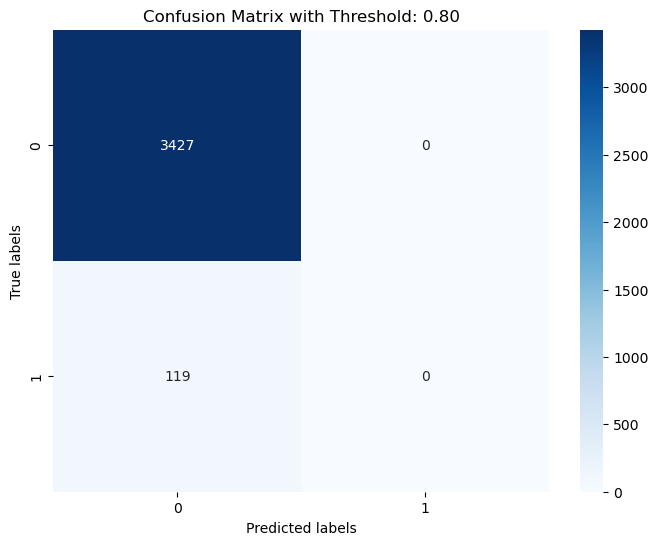

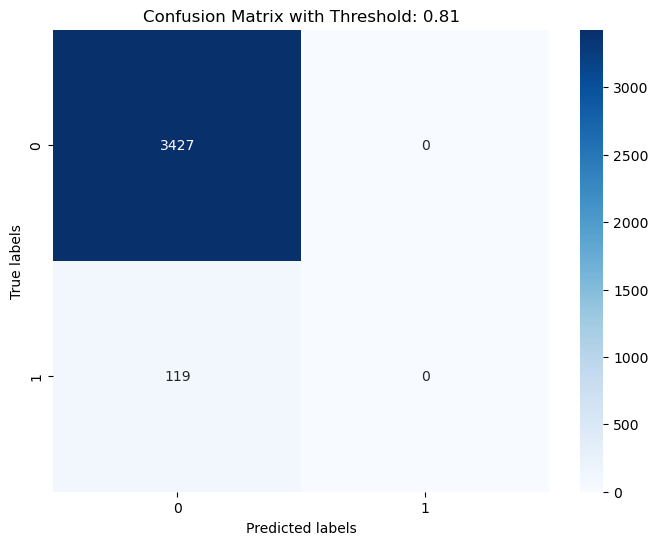

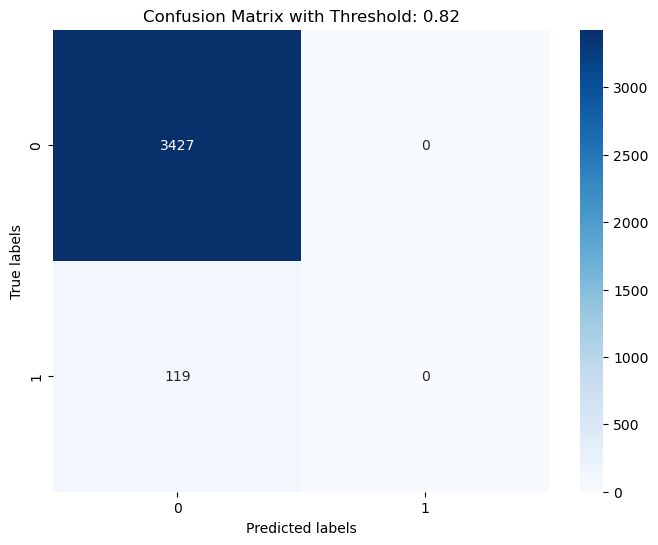

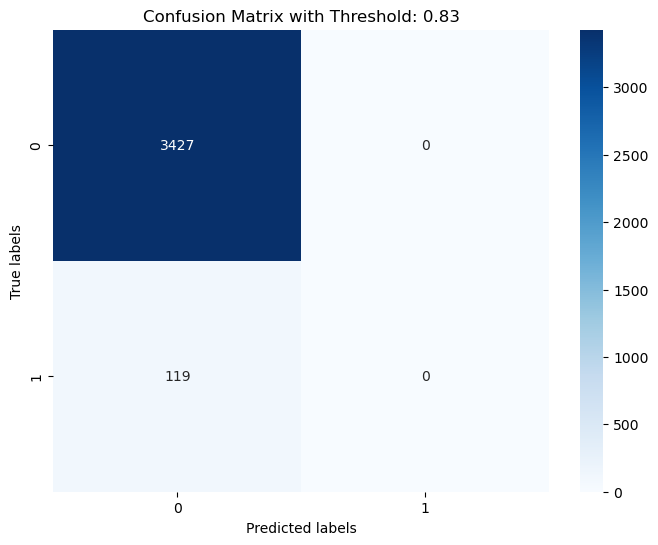

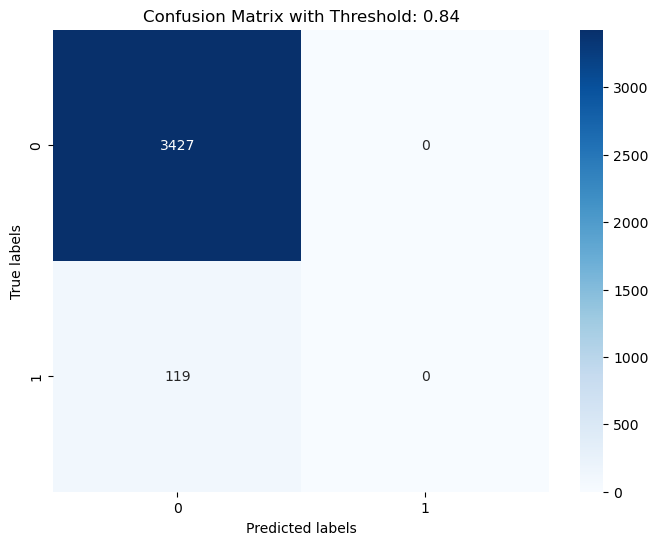

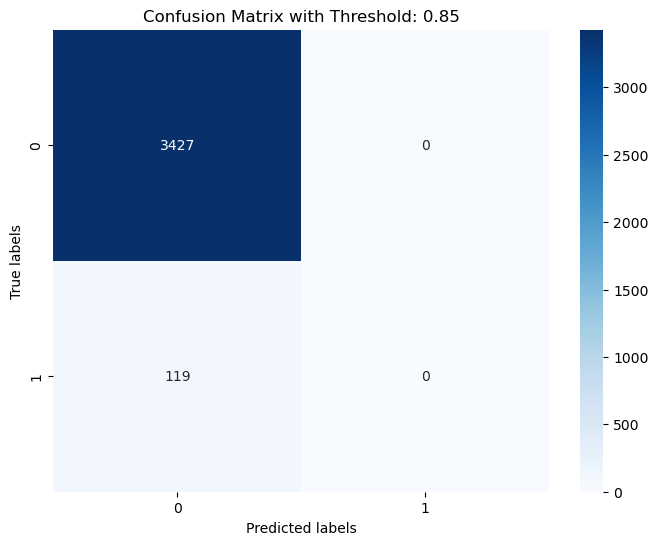

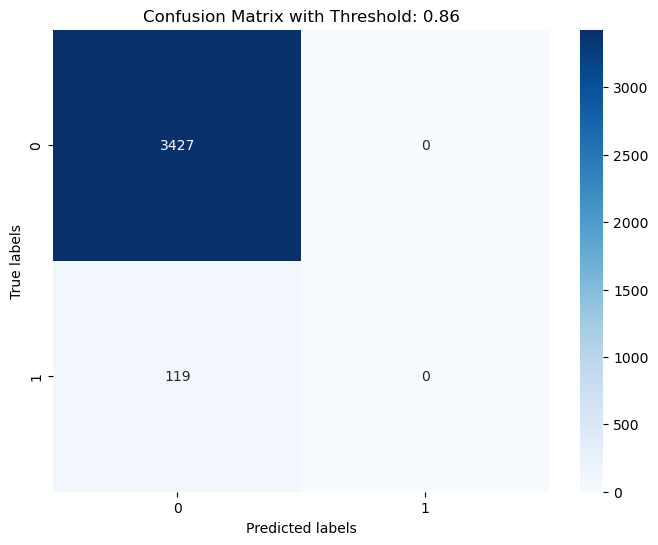

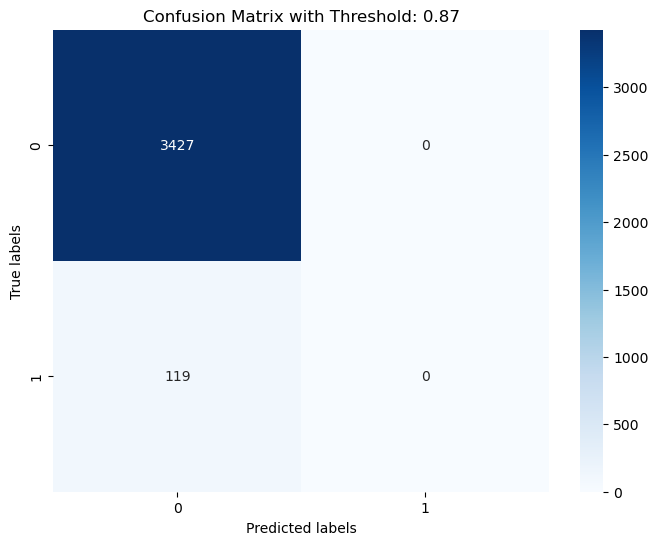

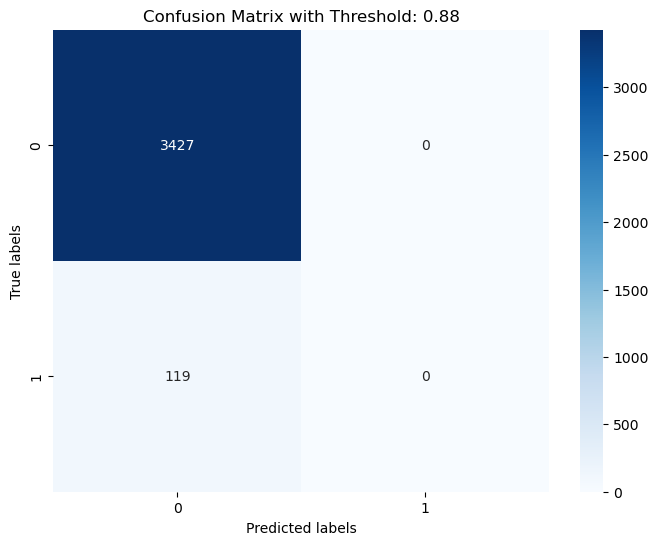

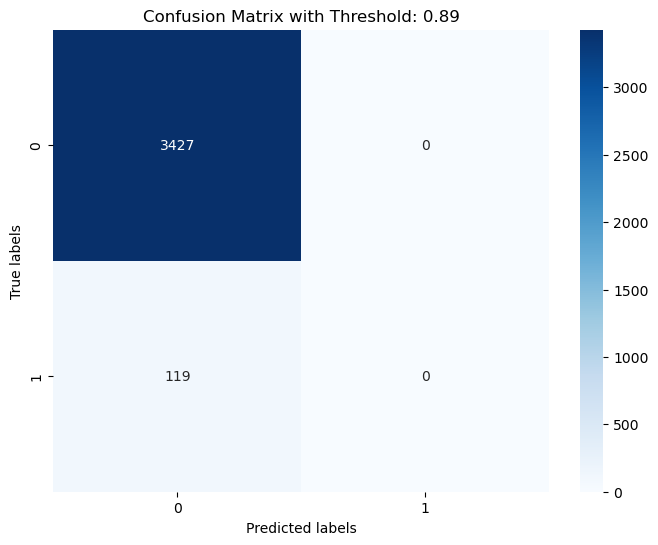

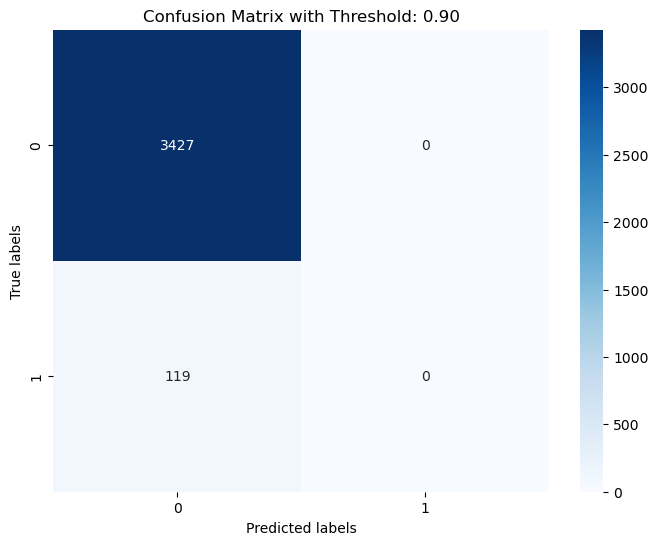

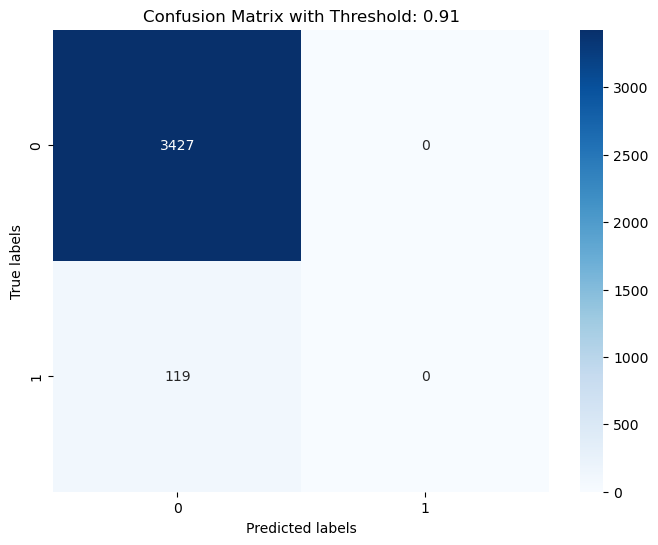

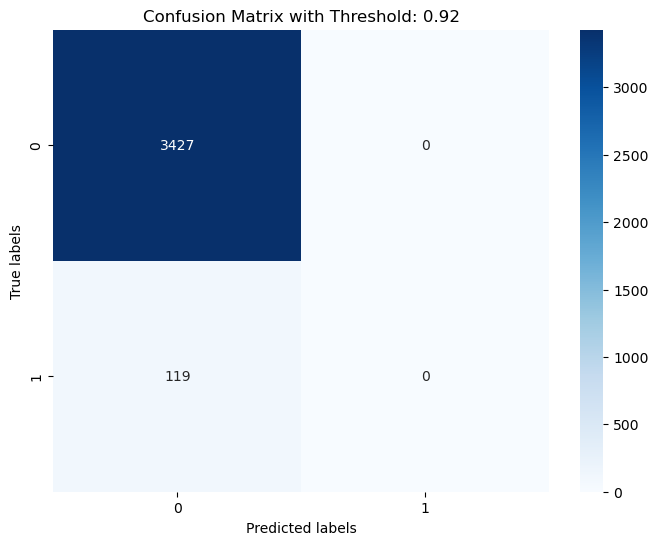

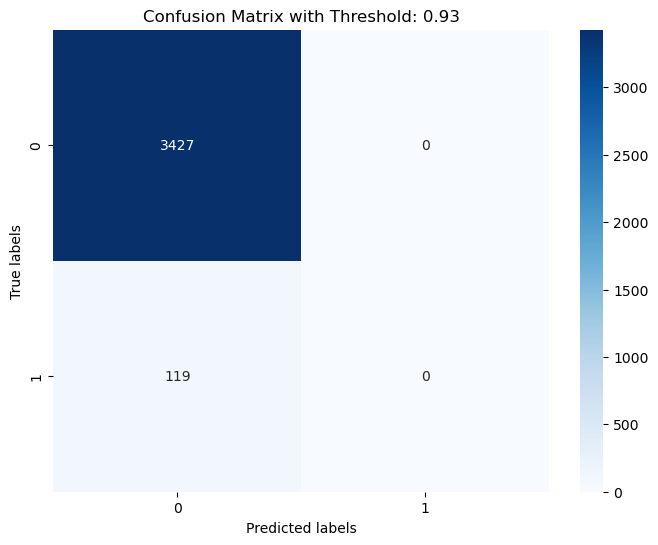

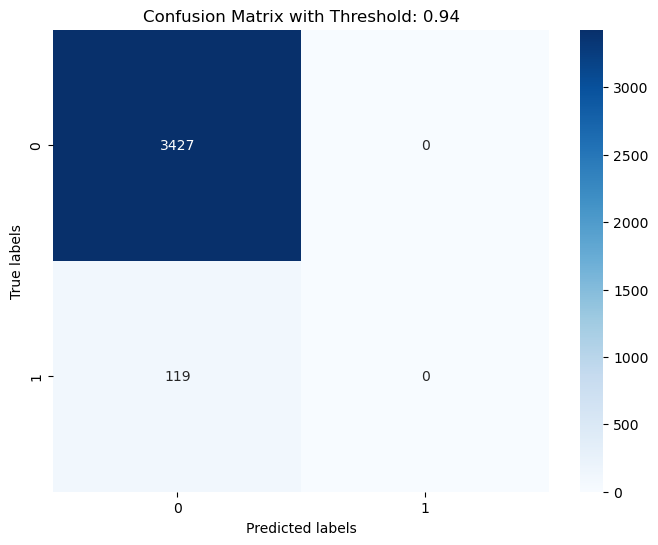

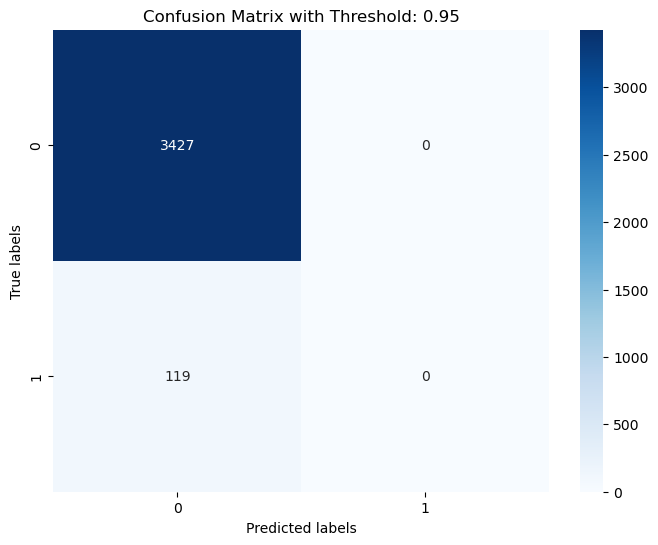

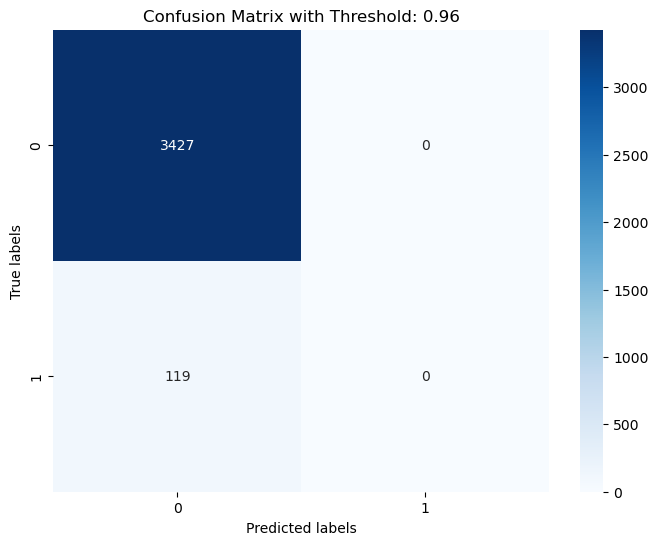

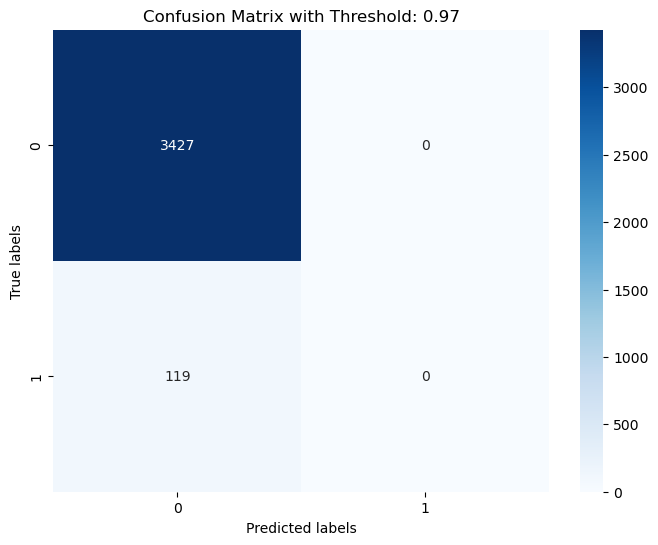

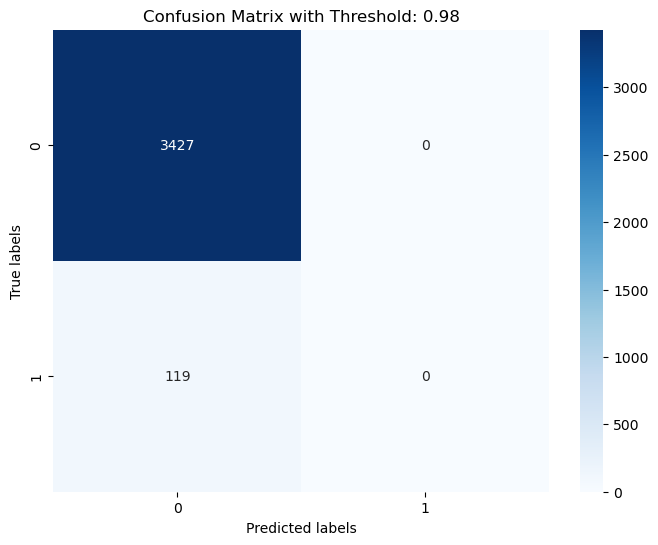

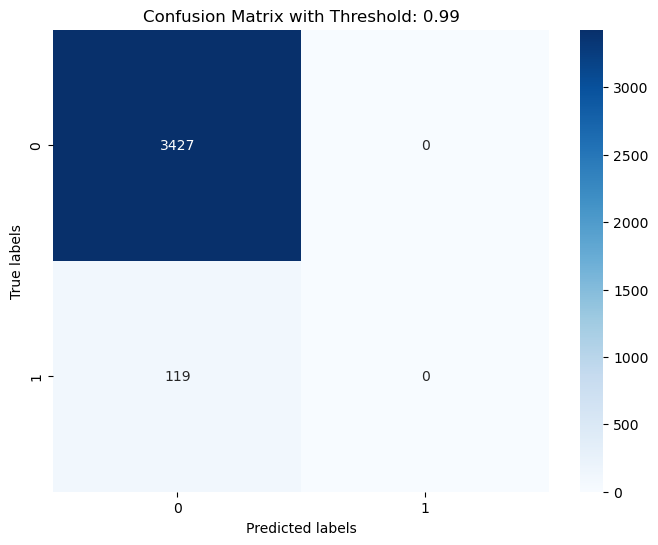

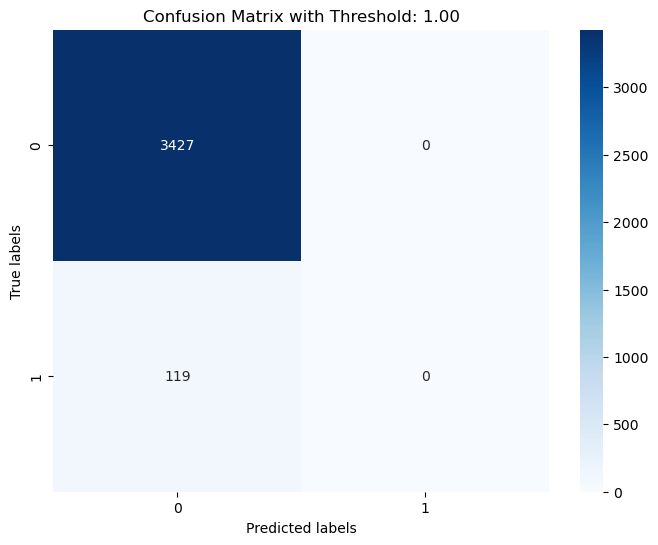

In [14]:

# Definicja modelu i trening
model.fit(X_train, y_train)

# Pobranie prawdopodobieństw przynależności do klasy pozytywnej
y_proba = model.predict_proba(X_test)[:, 1]

# Definiowanie różnych progów od 0.1 do 0.9 włącznie
thresholds = np.arange(0.01, 1.01, 0.01)  # Zmiana kroku na 0.01

# Iteracja przez progi i generowanie macierzy pomyłek dla każdego progu
for threshold in thresholds:
    # Przypisanie nowych etykiet na podstawie progu
    y_pred_custom_threshold = np.where(y_proba >= threshold, 1, 0)
    
    # Generowanie macierzy pomyłek
    conf_matrix_custom_threshold = confusion_matrix(y_test, y_pred_custom_threshold)
    
    # Wizualizacja macierzy pomyłek
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_custom_threshold, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix with Threshold: {threshold:.2f}')
    plt.show()



In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35700 entries, 0 to 35699
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Var1              35700 non-null  int64  
 1   Var4              35700 non-null  int64  
 2   Var5              35700 non-null  int64  
 3   Var6              35700 non-null  int64  
 4   Var7              35700 non-null  int64  
 5   Var15             35700 non-null  int64  
 6   Var16             35700 non-null  int64  
 7   Var23             35700 non-null  int64  
 8   Var24             35700 non-null  int64  
 9   Var29             35700 non-null  int64  
 10  Var30             35700 non-null  int64  
 11  Var2              35700 non-null  float64
 12  Var3              35700 non-null  float64
 13  Var11             35700 non-null  int64  
 14  Var12             35700 non-null  float64
 15  Var14             35700 non-null  int64  
 16  target            35700 non-null  float6

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3546 entries, 0 to 3545
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Var1              3546 non-null   int64  
 1   Var4              3546 non-null   int64  
 2   Var5              3546 non-null   int64  
 3   Var6              3546 non-null   int64  
 4   Var7              3546 non-null   int64  
 5   Var15             3546 non-null   int64  
 6   Var16             3546 non-null   int64  
 7   Var23             3546 non-null   int64  
 8   Var24             3546 non-null   int64  
 9   Var29             3546 non-null   int64  
 10  Var30             3546 non-null   int64  
 11  Var2              3546 non-null   float64
 12  Var3              3546 non-null   float64
 13  Var11             3546 non-null   int64  
 14  Var12             3546 non-null   float64
 15  Var14             3546 non-null   int64  
 16  target            3546 non-null   float64


In [15]:
X_train = df_train.drop('target', axis=1)
y_train = df_train['target']
X_test = df_test.drop('target', axis=1)
y_test = df_test['target']

# Zbuduj i dopasuj model regresji logistycznej
model = LogisticRegression()
model.fit(X_train, y_train)

# Przewiduj etykiety dla danych testowych
y_pred = model.predict(X_test)

# Wypisz raport klasyfikacji
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      3427
         1.0       0.00      0.00      0.00       119

    accuracy                           0.97      3546
   macro avg       0.48      0.50      0.49      3546
weighted avg       0.93      0.97      0.95      3546



c:\Users\jansl\.conda\envs\Spyder\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jansl\.conda\envs\Spyder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jansl\.conda\envs\Spyder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-define

In [6]:
# Istnieje teoretycznie 2^45 mozliwych modeli z roznymi parametrami ktore mozemy uzyskac z tego zestawu danych
# A więc istnieje 35184372088832
# Jest to 35 trylionów możliwych modeli 
2**45
# Przy zalozeniu ze wykorzystalbym wszystkie moce swojego kompa 6-rdzeniowemu komputerowi z maksymalnym taktowaniem 3.6 GHz i 16 GB RAM o szybkości 2667 MHz 
# 2^45sekund=35,184,372,088,832 sekund
# to jest około 185 lat XDDDDD


35184372088832

In [7]:
def prepare_balanced_data(df, ratio):
    df_majority = df[df.target == 0]
    df_minority = df[df.target == 1]
    n_samples = int(len(df_minority) * ratio) if ratio <= len(df_majority) / len(df_minority) else len(df_majority)
    df_majority_downsampled = resample(df_majority, replace=False, n_samples=n_samples, random_state=123)
    return pd.concat([df_majority_downsampled, df_minority])

# Funkcja do trenowania modelu i obliczania metryk
def train_evaluate_model(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

In [8]:
scalers = {"standard": StandardScaler(), "min_max": MinMaxScaler(), "robust": RobustScaler(), "none": None}
best_models = {}

# Iterowanie przez wszystkie skalery i różne proporcje downsamplingu i podziału zbioru treningowego
for scaler_name, scaler in scalers.items():
    best_score = 0
    for downsample_ratio in [0.5, 1, 2, 3]:
        df_train_balanced = prepare_balanced_data(df_train, downsample_ratio)
        for split_ratio in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
            X = df_train_balanced.drop('target', axis=1)
            y = df_train_balanced['target']
            X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=split_ratio, random_state=42)
            
            # Zdefiniowanie y_test tutaj
            y_test = df_test['target']

            # Skalowanie danych, jeśli scaler jest zdefiniowany
            if scaler:
                X_train_scaled = scaler.fit_transform(X_train)
                X_val_scaled = scaler.transform(X_val)
                X_test_scaled = scaler.transform(df_test.drop('target', axis=1))
            else:
                X_train_scaled = X_train
                X_val_scaled = X_val
                X_test_scaled = df_test.drop('target', axis=1)

            # Wybór najlepszej liczby cech przy użyciu RFE
            model = LogisticRegression(max_iter=1000)
            best_n_features = 0
            best_rfe_score = 0
            for n_features_to_select in range(1, X_train_scaled.shape[1] + 1):
                rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
                rfe.fit(X_train_scaled, y_train)
                X_train_rfe = rfe.transform(X_train_scaled)
                X_val_rfe = rfe.transform(X_val_scaled)

                # Trenowanie i ewaluacja modelu na danych po RFE
                model.fit(X_train_rfe, y_train)
                y_pred = model.predict(X_val_rfe)
                rfe_score = f1_score(y_val, y_pred)  # Wybierz odpowiednią metrykę
                if rfe_score > best_rfe_score:
                    best_rfe_score = rfe_score
                    best_n_features = n_features_to_select

            # Trenowanie modelu na pełnym zbiorze treningowym z wybraną liczbą cech
            rfe = RFE(estimator=model, n_features_to_select=best_n_features)
            rfe.fit(X_train_scaled, y_train)
            X_train_rfe = rfe.transform(X_train_scaled)
            X_test_rfe = rfe.transform(X_test_scaled)
            model.fit(X_train_rfe, y_train)

            # Ewaluacja modelu na zbiorze testowym
            y_test_pred = model.predict(X_test_rfe)
            test_score = f1_score(y_test, y_test_pred)  # Możesz użyć innej metryki, jeśli chcesz

            # Zapisanie najlepszego modelu dla danego skalera
            if test_score > best_score:
                best_score = test_score
                best_models[scaler_name] = (model, scaler, downsample_ratio, split_ratio)

# Trenowanie najlepszych modeli na pełnych danych treningowych i ocena na zbiorze testowym
final_results = {}
for scaler_name, (model, scaler, downsample_ratio, split_ratio) in best_models.items():
    if scaler:
        X_full_train_scaled = scaler.transform(df_train.drop('target', axis=1))
        X_test_scaled = scaler.transform(df_test.drop('target', axis=1))
    else:
        X_full_train_scaled = df_train.drop('target', axis=1)
        X_test_scaled = df_test.drop('target', axis=1)

    y_full_train = df_train['target']
    y_test = df_test['target']

    model.fit(X_full_train_scaled, y_full_train)
    y_test_pred = model.predict(X_test_scaled)

    final_metrics = {
        'accuracy': accuracy_score(y_test, y_test_pred),
        'precision': precision_score(y_test, y_test_pred, zero_division=0),
        'recall': recall_score(y_test, y_test_pred),
        'f1_score': f1_score(y_test, y_test_pred)
    }

    final_results[scaler_name] = final_metrics

final_results



{'standard': {'accuracy': 0.9664410603496898,
  'precision': 0.5,
  'recall': 0.01680672268907563,
  'f1_score': 0.03252032520325203},
 'min_max': {'accuracy': 0.9667230682459109,
  'precision': 0.6666666666666666,
  'recall': 0.01680672268907563,
  'f1_score': 0.032786885245901634},
 'robust': {'accuracy': 0.9664410603496898,
  'precision': 0.5,
  'recall': 0.01680672268907563,
  'f1_score': 0.03252032520325203},
 'none': {'accuracy': 0.9661590524534687,
  'precision': 0.4,
  'recall': 0.01680672268907563,
  'f1_score': 0.03225806451612903}}

In [ ]:
"""""


scalers = {"standard": StandardScaler(), "min_max": MinMaxScaler(), "robust": RobustScaler(), "none": None}
best_models = {}

# Iterowanie przez wszystkie skalery i różne proporcje downsamplingu i podziału zbioru treningowego
for scaler_name, scaler in scalers.items():
    best_score = 0
    for downsample_ratio in [0.5, 1, 2, 3]:
        df_train_balanced = prepare_balanced_data(df_train, downsample_ratio)
        for split_ratio in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
            X = df_train_balanced.drop('target', axis=1)
            y = df_train_balanced['target']
            X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=split_ratio, random_state=42)

            # Skalowanie danych, jeśli scaler jest zdefiniowany
            if scaler:
                X_train_scaled = scaler.fit_transform(X_train)
                X_val_scaled = scaler.transform(X_val)
                X_test_scaled = scaler.transform(df_test.drop('target', axis=1))
            else:
                X_train_scaled = X_train
                X_val_scaled = X_val
                X_test_scaled = df_test.drop('target', axis=1)

            # Trenowanie i ewaluacja modelu na zbiorze walidacyjnym
            metrics = train_evaluate_model(X_train_scaled, y_train, X_val_scaled, y_val)
            if metrics['f1_score'] > best_score:
                best_score = metrics['f1_score']
                best_models[scaler_name] = (LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train), scaler, downsample_ratio, split_ratio)

# Dla każdego skalera, trenowanie najlepszego modelu na pełnym zbiorze treningowym i ewaluacja na zbiorze testowym
final_results = {}
for scaler_name, (model, scaler, downsample_ratio, split_ratio) in best_models.items():
    if scaler:
        X_full_train_scaled = scaler.transform(df_train.drop('target', axis=1))
    else:
        X_full_train_scaled = df_train.drop('target', axis=1)
    y_full_train = df_train['target']
    X_test_scaled = scaler.transform(df_test.drop('target', axis=1)) if scaler else df_test.drop('target', axis=1)
    y_test = df_test['target']

    final_metrics = train_evaluate_model(X_full_train_scaled, y_full_train, X_test_scaled, y_test)
    final_results[scaler_name] = final_metrics

final_results
""""